In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, LassoCV, RidgeCV
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.linear_model import lars_path
from sklearn import linear_model
import statsmodels.api as sm
import scipy as sp
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.tree import DecisionTreeRegressor
import math
import time
from sklearn import metrics
from sklearn import tree
import graphviz
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import OLSInfluence as influence
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
#import dataset

df = pd.read_csv("salary_logged_data_all_cities.csv")

In [3]:
df.head()

,Size,Revenue,Internship,Low,25_%,75_%,High,Cash_Bonus,Stock_Bonus,Total_Pay,Confidence,Reviews,Jobs,Salaries,Interviews,Benefits,Salary,Company_Type,Geo_Map,COL,Rent,COL_Plus_Rent,Purchasing_Power,Industry_Final,Age,Additional_Pay_bin
0,10000+ Employees,$5 to $10 billion (USD),0,80000,101000,151000,230000,10595,10595,129704,Very High Confidence,6500,2700,1600,12.639666,2000,127210.0,Company - Public,NORTH_EAST,72.38,44.68,59.56,115.56,Other,107.0,High
1,10000+ Employees,$10+ billion (USD),0,73000,81000,108000,126000,2224,2224,89206,Very High Confidence,3200,97,6900,8.432376,997,89206.0,Other,NORTH_EAST,72.38,44.68,59.56,115.56,Other,74.0,High
2,10000+ Employees,$5 to $10 billion (USD),0,75000,82000,90000,108000,0,0,85646,Very High Confidence,7500,713,1100,12.792557,2200,85646.0,Company - Public,NORTH_EAST,72.38,44.68,59.56,115.56,Technology,98.0,Low
3,Less Than 1000,Unknown / Non-Applicable,0,66000,68000,83000,94000,4339,4339,73355,Very High Confidence,52,72,74,3.882878,43,70119.0,Company - Private,NORTH_EAST,72.38,44.68,59.56,115.56,Other,19.0,High
4,10000+ Employees,$10+ billion (USD),0,101000,104000,143000,152000,0,0,108605,Very High Confidence,7800,3600,1900,12.639666,2200,108605.0,Company - Public,NORTH_EAST,72.38,44.68,59.56,115.56,Other,82.0,Low


In [4]:

df.shape

(1305, 26)

In [5]:
#check for any Nan Values 

df=df.dropna()
df.shape

(1305, 26)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

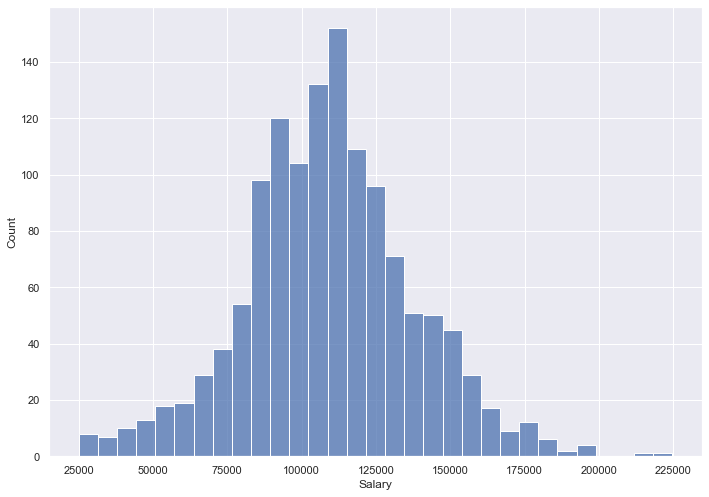

In [6]:
#histogram of base pay 

sns.histplot(data=df, x="Salary")

In [7]:
#standardize numerical variables

num_cols = [ "Age","Interviews", "Benefits","Salaries", "Jobs","Reviews","Stock_Bonus", "Cash_Bonus", "High", "75_%", "25_%", "Low", "Total_Pay"]
std = StandardScaler()
std.fit(df[num_cols].values)

#apply

df[num_cols]= std.transform(df[num_cols].values)

In [8]:

#drop NA from df and make dummy variables for categorical predictors 

df_model = pd.get_dummies(df, drop_first = True)
df_model.head()

,Low,25_%,75_%,High,Cash_Bonus,Stock_Bonus,Total_Pay,Reviews,Jobs,Salaries,Interviews,Benefits,Salary,COL,Rent,COL_Plus_Rent,Purchasing_Power,Age,Size_1001 to 5000 Employees,Size_5001 to 10000 Employees,Size_Less Than 1000,Size_Unknown,Revenue_$2 to $5 billion (USD),Revenue_$5 to $10 billion (USD),Revenue_Less than 5 billion (USD),Revenue_Unknown / Non-Applicable,Internship_INTERN / PART TIME,Confidence_Low Confidence,Confidence_Very High Confidence,Company_Type_Company - Public,Company_Type_Other,Company_Type_Subsidiary or Business Segment,Geo_Map_NORTH_EAST,Geo_Map_SOUTH,Geo_Map_WEST,Industry_Final_Other,Industry_Final_Technology,Additional_Pay_bin_Low
0,0.749645,1.141457,1.454336,2.131602,0.627880,0.627880,1.227197,1.577550,0.442293,-0.363245,0.864343,0.359243,127210.0,72.38,44.68,59.56,115.56,1.112576,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
1,0.610658,0.761694,0.819574,0.788608,-0.218297,-0.218297,0.578575,0.318847,-0.528753,1.014348,-0.070175,-0.153895,89206.0,72.38,44.68,59.56,115.56,0.450683,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2,0.650369,0.780682,0.553860,0.556167,-0.443108,-0.443108,0.521558,1.958975,-0.298955,-0.493207,0.898303,0.461563,85646.0,72.38,44.68,59.56,115.56,0.932060,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1
3,0.471672,0.514848,0.450526,0.375379,-0.004503,-0.004503,0.324704,-0.881879,-0.538079,-0.759888,-1.080705,-0.641964,70119.0,72.38,44.68,59.56,115.56,-0.652471,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
4,1.166604,1.198421,1.336241,1.124357,-0.443108,-0.443108,0.889273,2.073402,0.778037,-0.285268,0.864343,0.461563,108605.0,72.38,44.68,59.56,115.56,0.611142,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1


In [9]:

df_model.shape

(1305, 38)

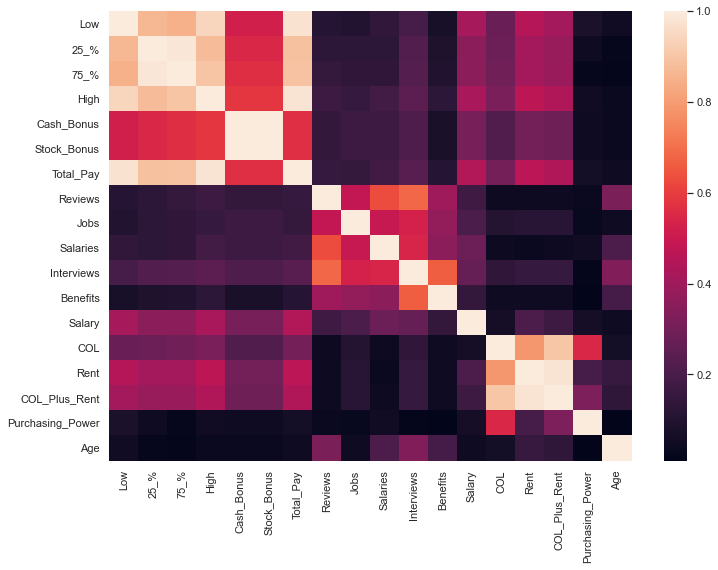

In [10]:
df_corr = df.corr().abs()
hm = sns.heatmap(df_corr)
figure = hm.get_figure()  
figure.savefig('heatmap.png', dpi=400)

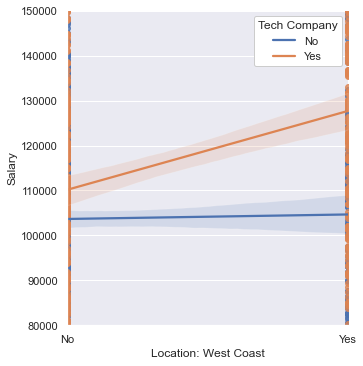

In [11]:
#check for interaction between west coast and tech jobs 

lm = sns.lmplot(x="Geo_Map_WEST", y="Salary", hue="Industry_Final_Technology", data=df_model, 
                legend=False)



lm.savefig("Interaction_West_Tech.png", dpi=400)
plt.legend(title='Tech Company', loc='upper right', labels=['No', 'Yes'],  facecolor='white', framealpha=1
          )
plt.xlabel("Location: West Coast")
plt.ylim(80000, 150000)
plt.xticks([0,1], ["No", "Yes"])
lm.savefig("Interaction_West_Tech.png", dpi=400)
plt.show()

In [12]:

#add interaction term to df 

df_model["Interact_West_Tech"] = df_model["Geo_Map_WEST"] * df_model["Industry_Final_Technology"]

In [13]:
#define X and y 
cols = ["Salary",]
X = df_model.drop(cols, axis = 1)
y = df_model["Salary"]

In [14]:
#create a correlation df for the features 

X_corr = X.corr().abs()

In [15]:
#get list of correlations amongst features 

X_corr_list = X_corr.unstack().sort_values(ascending=False).drop_duplicates()
X_corr_list.head(25)

Interact_West_Tech               Interact_West_Tech                 1.000000
75_%                             25_%                               0.984942
Total_Pay                        High                               0.977055
Rent                             COL_Plus_Rent                      0.977016
Total_Pay                        Low                                0.973310
High                             Low                                0.942986
COL                              COL_Plus_Rent                      0.901551
75_%                             High                               0.897609
Total_Pay                        75_%                               0.892348
25_%                             Total_Pay                          0.891234
High                             25_%                               0.879171
Low                              25_%                               0.868420
                                 75_%                               0.850606

In [16]:
#Getting list of highly correlated features 
correlated_features = set()
for i in range(len(X_corr.columns)):
    for j in range(i):
        if abs(X_corr.iloc[i, j]) > 0.7:
            colname = X_corr.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'Rent', '25_%', 'Industry_Final_Technology', '75_%', 'Confidence_Low Confidence', 'Stock_Bonus', 'Total_Pay', 'High', 'COL_Plus_Rent', 'Confidence_Very High Confidence'}


In [17]:
#dropping highly correlated features from the training set 
corr_features = ['Rent', 'Confidence_Very High Confidence', 'COL_Plus_Rent', 'Confidence_Low Confidence', 
                 '25_%', 'Stock_Bonus', '75_%', 'High', 'Total_Pay']
X.drop(corr_features, axis=1, inplace=True)
X.head()


,Low,Cash_Bonus,Reviews,Jobs,Salaries,Interviews,Benefits,COL,Purchasing_Power,Age,Size_1001 to 5000 Employees,Size_5001 to 10000 Employees,Size_Less Than 1000,Size_Unknown,Revenue_$2 to $5 billion (USD),Revenue_$5 to $10 billion (USD),Revenue_Less than 5 billion (USD),Revenue_Unknown / Non-Applicable,Internship_INTERN / PART TIME,Company_Type_Company - Public,Company_Type_Other,Company_Type_Subsidiary or Business Segment,Geo_Map_NORTH_EAST,Geo_Map_SOUTH,Geo_Map_WEST,Industry_Final_Other,Industry_Final_Technology,Additional_Pay_bin_Low,Interact_West_Tech
0,0.749645,0.627880,1.577550,0.442293,-0.363245,0.864343,0.359243,72.38,115.56,1.112576,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1,0.610658,-0.218297,0.318847,-0.528753,1.014348,-0.070175,-0.153895,72.38,115.56,0.450683,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2,0.650369,-0.443108,1.958975,-0.298955,-0.493207,0.898303,0.461563,72.38,115.56,0.932060,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0
3,0.471672,-0.004503,-0.881879,-0.538079,-0.759888,-1.080705,-0.641964,72.38,115.56,-0.652471,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,1.166604,-0.443108,2.073402,0.778037,-0.285268,0.864343,0.461563,72.38,115.56,0.611142,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [18]:
#partition data into test data 

X, X_test, y, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

#partition remaining data into train / validation


X_train, X_val, y_train, y_val = train_test_split (X, y, test_size= .25, random_state = 33)

In [19]:
#documentation shows VIf assumes constant is present in the dataset.
#the constant will be added before running vif.
#https://github.com/statsmodels/statsmodels/issues/2376

X_train = sm.add_constant(X_train)

In [20]:
def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [21]:
X_train.shape

(783, 30)

In [22]:
X_train_vif = vif(X_train)
X_train_vif.sort_values(ascending=False)

const                                          479.160027
Interviews                                       5.687980
Size_Less Than 1000                              4.404541
Revenue_Less than 5 billion (USD)                3.721049
Revenue_Unknown / Non-Applicable                 3.622153
Industry_Final_Technology                        3.125001
COL                                              2.856816
Reviews                                          2.814410
Interact_West_Tech                               2.642114
Geo_Map_WEST                                     2.633615
Company_Type_Company - Public                    2.423486
Industry_Final_Other                             2.398543
Salaries                                         2.290239
Size_1001 to 5000 Employees                      2.269895
Benefits                                         2.164768
Geo_Map_NORTH_EAST                               2.150843
Low                                              1.872786
Purchasing_Pow

In [23]:
#remove high inflation factors
high_vif = ["Interviews"]
X_train.drop(high_vif, axis=1, inplace=True)
X_train.head()

,const,Low,Cash_Bonus,Reviews,Jobs,Salaries,Benefits,COL,Purchasing_Power,Age,Size_1001 to 5000 Employees,Size_5001 to 10000 Employees,Size_Less Than 1000,Size_Unknown,Revenue_$2 to $5 billion (USD),Revenue_$5 to $10 billion (USD),Revenue_Less than 5 billion (USD),Revenue_Unknown / Non-Applicable,Internship_INTERN / PART TIME,Company_Type_Company - Public,Company_Type_Other,Company_Type_Subsidiary or Business Segment,Geo_Map_NORTH_EAST,Geo_Map_SOUTH,Geo_Map_WEST,Industry_Final_Other,Industry_Final_Technology,Additional_Pay_bin_Low,Interact_West_Tech
645,1.0,-0.838773,-0.443108,-0.829242,-0.563447,-0.663717,-0.629686,66.89,123.76,-0.672528,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
768,1.0,1.385012,2.408076,-0.618314,-0.415719,-0.311260,-0.485926,100.00,100.00,-0.732700,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
962,1.0,-0.838773,-0.443108,0.013707,-0.555239,-0.077329,-0.364676,69.69,119.78,3.038082,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
1304,1.0,0.908487,-0.443108,-0.693836,-0.550390,-0.389237,-0.547830,83.78,99.77,-0.592299,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
830,1.0,-0.838773,-0.443108,-0.899806,-0.564193,-0.776783,-0.663963,67.03,104.88,0.450683,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0


In [24]:
#get shape of  X and y 


print(X_train.shape, y_train.shape)

(783, 29) (783,)


In [25]:
#define mae 
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [26]:
## Creating LARS Path

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train.values, y_train.values, method='lasso')

Computing regularization path using the LARS ...


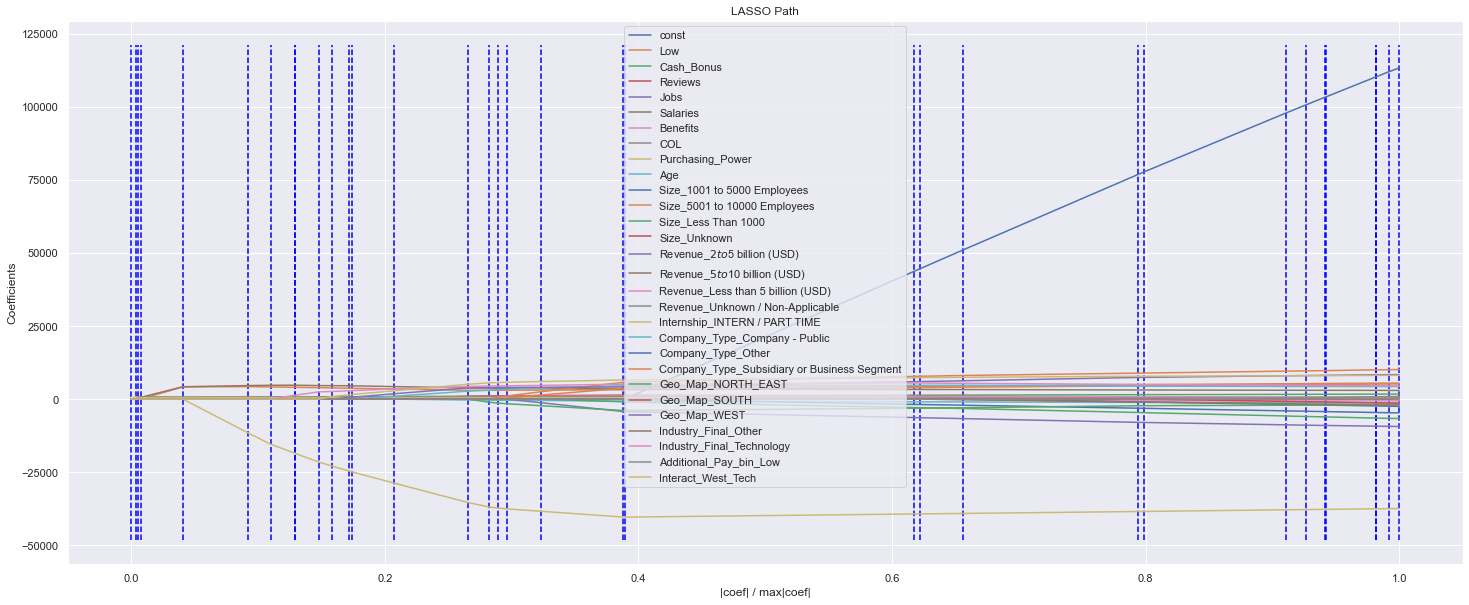

In [27]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(25,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed', color = "blue")
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')

plt.legend(X_train.columns)
plt.savefig('Lasso_LARS_path_train.png')
plt.show()

In [28]:
#create df to store results
cols = ["TEST","FEAT", "OBS","ALPHA", "MAE", "RMSE", "R2", "ADJ_R2"]
results_df = pd.DataFrame(columns=cols)
results_df.head()

,TEST,FEAT,OBS,ALPHA,MAE,RMSE,R2,ADJ_R2


In [29]:
#Using Lasso on train data 

alphas = 100**np.linspace(-2,2,100)
Glassdoor_Lasso = LassoCV(alphas = alphas,
                             
                             cv=5, random_state=33)


Glassdoor_Lasso.fit(X_train, y_train)


LassoCV(alphas=array([    0.0001    ,     0.00012045,     0.00014508,     0.00017475,
           0.00021049,     0.00025354,     0.00030539,     0.00036784,
           0.00044306,     0.00053367,     0.00064281,     0.00077426,
           0.0009326 ,     0.00112332,     0.00135305,     0.00162975,
           0.00196304,     0.00236449,     0.00284804,     0.00343047,
           0.00413201,     0.00497702,     0.00599484,     0.00722081,
           0.00869749,     0.01047616,     0.01261857,     0.01519911,
           0.01830738,     0.02205131,     0.0...
          65.79332247,    79.24828984,    95.45484567,   114.97569954,
         138.48863714,   166.81005372,   200.92330026,   242.01282648,
         291.50530628,   351.11917342,   422.92428744,   509.41380148,
         613.59072734,   739.07220335,   890.21508545,  1072.26722201,
        1291.54966501,  1555.67614393,  1873.81742286,  2257.01971963,
        2718.58824273,  3274.54916288,  3944.20605944,  4750.8101621 ,
        5722

In [30]:
#Standardized coefficients found
# when refit using that best alpha
list(zip(X_train.columns, Glassdoor_Lasso.coef_))

[('const', 0.0),
 ('Low', 5097.555709067001),
 ('Cash_Bonus', 1747.3236621244453),
 ('Reviews', 544.6651870042165),
 ('Jobs', 411.10805698243996),
 ('Salaries', 3113.973019987254),
 ('Benefits', 797.2594563847755),
 ('COL', -28.140905286119306),
 ('Purchasing_Power', -24.611615521647494),
 ('Age', -1131.4424139749042),
 ('Size_1001 to 5000 Employees', -2896.4405593372812),
 ('Size_5001 to 10000 Employees', 4051.0118731804864),
 ('Size_Less Than 1000', -4572.334785683969),
 ('Size_Unknown', 0.0),
 ('Revenue_$2 to $5 billion (USD)', -6758.194078767173),
 ('Revenue_$5 to $10 billion (USD)', 0.0),
 ('Revenue_Less than 5 billion (USD)', -166.51802233335516),
 ('Revenue_Unknown / Non-Applicable', 0.0),
 ('Internship_INTERN / PART TIME', -35857.72539725503),
 ('Company_Type_Company - Public', 3977.1672187067365),
 ('Company_Type_Other', -1203.5016900383896),
 ('Company_Type_Subsidiary or Business Segment', 7448.292466962608),
 ('Geo_Map_NORTH_EAST', -195.2643758578483),
 ('Geo_Map_SOUTH', -73

In [31]:


# Make predictions on the test set using lasso
y_train_pred_lasso = Glassdoor_Lasso.predict(X_train)

# Best alpha value found
print("Alpha: " + str(Glassdoor_Lasso.alpha_))

#get mae for lasso cv model
lasso_mae = mae(y_train, y_train_pred_lasso)
print("MAE: " + str(lasso_mae))


#derive residuals for the model

residuals_lasso = y_train - y_train_pred_lasso

#define mse and rmse 

lasso_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_rmse = math.sqrt(lasso_mse)

print("RMSE: " + str(lasso_rmse))

#get r2 for lasso model


lasso_r2=r2_score(y_train, y_train_pred_lasso)
print("R2: " + str(lasso_r2))

#get adjust r2 for the model 
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

lasso_adj_r2 = 1-(1-lasso_r2)*(783-1)/(783-24-1)
print("Adjusted R2: " + str(lasso_adj_r2))

results_df.loc[0] = ["LASSO", 24, 783,Glassdoor_Lasso.alpha_, lasso_mae,
             lasso_rmse, lasso_r2, lasso_adj_r2]
results_df.head()

Alpha: 138.48863713938746
MAE: 16138.464503005564
RMSE: 20873.196369312034
R2: 0.4510300394167527
Adjusted R2: 0.4336484047808715


,TEST,FEAT,OBS,ALPHA,MAE,RMSE,R2,ADJ_R2
0,LASSO,24,783,138.488637,16138.464503,20873.196369,0.45103,0.433648


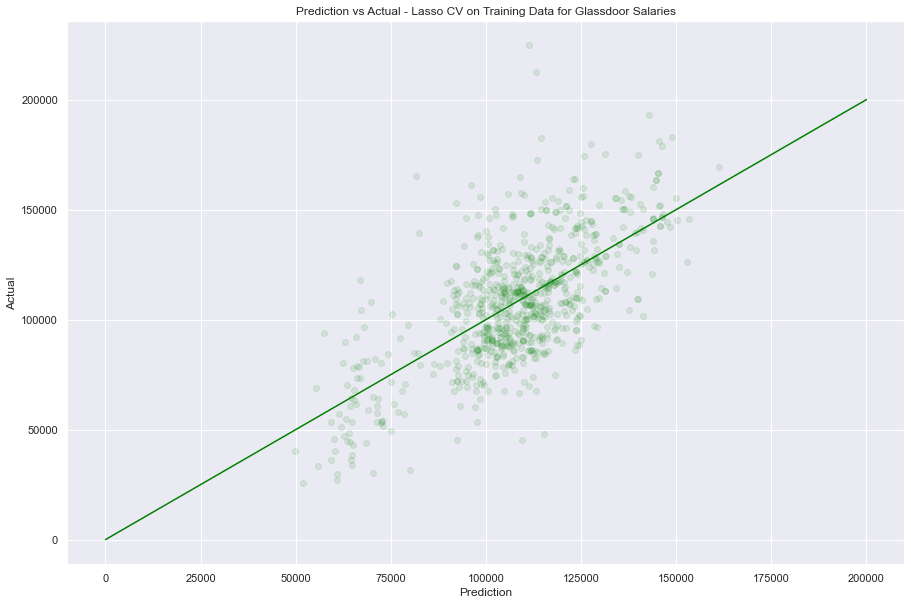

In [32]:
#plotting the predictions 
plt.figure(figsize=(15,10))
plt.scatter(y_train_pred_lasso, y_train, alpha=.1, color = "green")
plt.title("Prediction vs Actual - Lasso CV on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.plot(np.linspace(0,200000,1000), np.linspace(0,200000,1000), color = "green")

plt.savefig('Lasso_PredvsActual_Train.png',dpi=400)

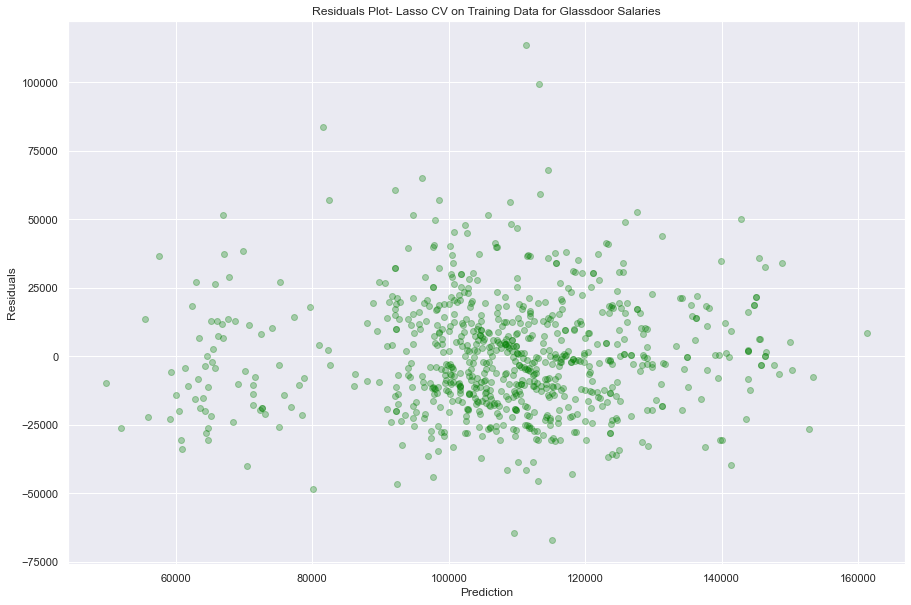

In [33]:
#plotting the residuals 
plt.figure(figsize=(15,10))

residual = plt.scatter(y_train_pred_lasso, residuals_lasso, alpha = .3, color = "green")
plt.title("Residuals Plot- Lasso CV on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.savefig('Lasso_Residuals_Train.png', edgecolor='none', dpi=400)
plt.show()

<Figure size 842.4x595.44 with 0 Axes>

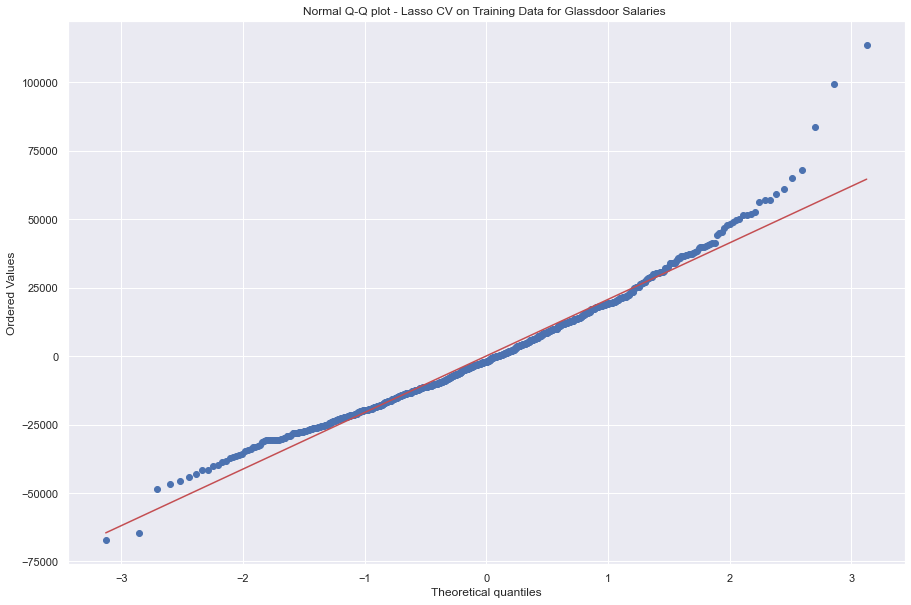

In [34]:
#qq plot
fig = plt.figure()

fig.patch.set_alpha(1)
plt.figure(figsize=(15,10))
stats.probplot(residuals_lasso, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Lasso CV on Training Data for Glassdoor Salaries ")

plt.savefig('Lasso_QQ_Train.png', edgecolor='white', dpi=400)

In [35]:
#Using Ridge on train data 

alphas = 100**np.linspace(-2,2,100)
Glassdoor_Ridge = RidgeCV(alphas = alphas,
                             
                             cv=5)


Glassdoor_Ridge.fit(X_train, y_train)


RidgeCV(alphas=array([    0.0001    ,     0.00012045,     0.00014508,     0.00017475,
           0.00021049,     0.00025354,     0.00030539,     0.00036784,
           0.00044306,     0.00053367,     0.00064281,     0.00077426,
           0.0009326 ,     0.00112332,     0.00135305,     0.00162975,
           0.00196304,     0.00236449,     0.00284804,     0.00343047,
           0.00413201,     0.00497702,     0.00599484,     0.00722081,
           0.00869749,     0.01047616,     0.01261857,     0.01519911,
           0.01830738,     0.02205131,     0.0...
          65.79332247,    79.24828984,    95.45484567,   114.97569954,
         138.48863714,   166.81005372,   200.92330026,   242.01282648,
         291.50530628,   351.11917342,   422.92428744,   509.41380148,
         613.59072734,   739.07220335,   890.21508545,  1072.26722201,
        1291.54966501,  1555.67614393,  1873.81742286,  2257.01971963,
        2718.58824273,  3274.54916288,  3944.20605944,  4750.8101621 ,
        5722

In [36]:
#Standardized coefficients found
# when refit using that best alpha
list(zip(X_train.columns, Glassdoor_Ridge.coef_))

[('const', 0.0),
 ('Low', 5519.075647706456),
 ('Cash_Bonus', 1707.1338540237546),
 ('Reviews', 302.32736890643434),
 ('Jobs', 453.80351499291135),
 ('Salaries', 3326.1006749137423),
 ('Benefits', 776.7023286018147),
 ('COL', -87.45277249533953),
 ('Purchasing_Power', -51.48465307982838),
 ('Age', -1267.5265911925324),
 ('Size_1001 to 5000 Employees', -3916.940780312153),
 ('Size_5001 to 10000 Employees', 5242.24673322164),
 ('Size_Less Than 1000', -5797.633691441431),
 ('Size_Unknown', 542.9302843717062),
 ('Revenue_$2 to $5 billion (USD)', -7801.642952154431),
 ('Revenue_$5 to $10 billion (USD)', 875.464553990349),
 ('Revenue_Less than 5 billion (USD)', -136.03886978451914),
 ('Revenue_Unknown / Non-Applicable', 1217.5314893625134),
 ('Internship_INTERN / PART TIME', -33131.19942435505),
 ('Company_Type_Company - Public', 4193.829710255522),
 ('Company_Type_Other', -2524.722118734152),
 ('Company_Type_Subsidiary or Business Segment', 8870.149892642727),
 ('Geo_Map_NORTH_EAST', -1617.

In [37]:
# Make predictions on the test set using 
y_train_pred_ridge = Glassdoor_Ridge.predict(X_train)


# Best alpha value found
print("Alpha: " + str(Glassdoor_Ridge.alpha_))

#derive residuals for the model

residuals_ridge = y_train - y_train_pred_ridge

#get mae for the model
ridge_mae = mae(y_train, y_train_pred_ridge)
print("MAE: " + str(ridge_mae))

#get RMSE for the model

ridge_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_rmse = math.sqrt(ridge_mse)

print("RMSE: " + str(ridge_rmse))

#get r2 for ridge model


ridge_r2=r2_score(y_train, y_train_pred_ridge)
print("R2: " + str(ridge_r2))

#get adjust r2 for the model 
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

ridge_adj_r2 = 1-(1-ridge_r2)*(783-1)/(783-28-1)
print("Adjusted R2: " + str(ridge_adj_r2))

results_df.loc[1] = ["RIDGE", 28, 783, Glassdoor_Ridge.alpha_, ridge_mae,
             ridge_rmse, ridge_r2, ridge_adj_r2]
results_df.head()

Alpha: 7.054802310718645
MAE: 16117.856067350529
RMSE: 20851.420097744212
R2: 0.45217488401728956
Adjusted R2: 0.4318312457579847


,TEST,FEAT,OBS,ALPHA,MAE,RMSE,R2,ADJ_R2
0,LASSO,24,783,138.488637,16138.464503,20873.196369,0.451030,0.433648
1,RIDGE,28,783,7.054802,16117.856067,20851.420098,0.452175,0.431831


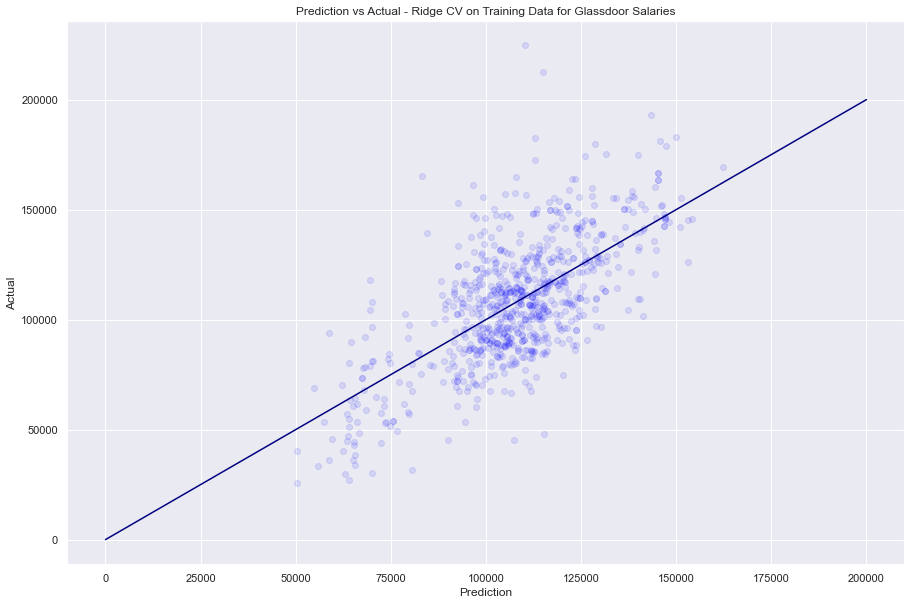

In [38]:
#plotting the predictions 
plt.figure(figsize=(15,10))
plt.scatter(y_train_pred_ridge, y_train, alpha=.1, color = "blue")
plt.title("Prediction vs Actual - Ridge CV on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.plot(np.linspace(0,200000,1000), np.linspace(0,200000,1000), color = "navy")

plt.savefig('Ridge_PredvsActual_Train.png')


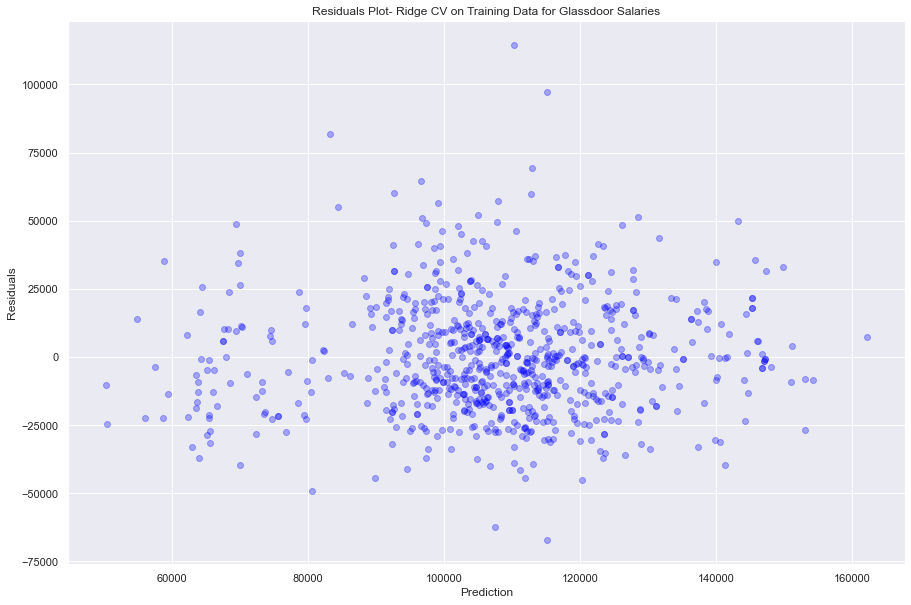

In [39]:
#plotting the residuals 
plt.figure(figsize=(15,10))

residual = plt.scatter(y_train_pred_ridge, residuals_ridge, alpha = .3, color = "blue")
plt.title("Residuals Plot- Ridge CV on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.savefig('Ridge_Residuals_Train.png', edgecolor='none')
plt.show()

<Figure size 842.4x595.44 with 0 Axes>

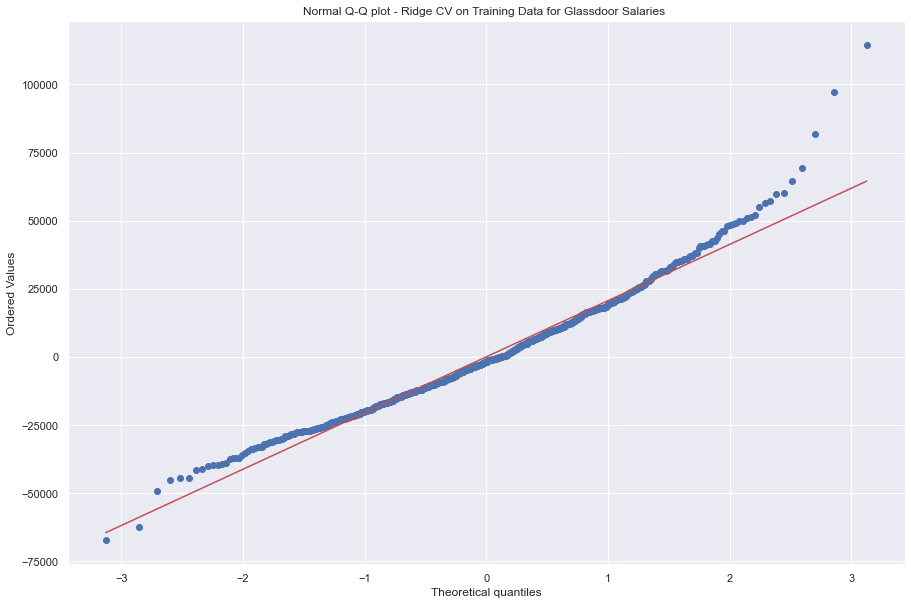

In [40]:
#qq plot
fig = plt.figure()

fig.patch.set_alpha(1)
plt.figure(figsize=(15,10))
stats.probplot(residuals_ridge, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Ridge CV on Training Data for Glassdoor Salaries ")

plt.savefig('Ridge_QQ_Train.png', edgecolor='white')

In [41]:

ols_all = sm.OLS(y_train, X_train).fit()
print(ols_all.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     22.41
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.68e-80
Time:                        10:25:27   Log-Likelihood:                -8896.6
No. Observations:                 783   AIC:                         1.785e+04
Df Residuals:                     754   BIC:                         1.799e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [42]:
# Make predictions on the test set using 
y_train_pred_ols_all = ols_all.predict(X_train)


# Best alpha value found
# no method for alpha for OLS found 

#derive residuals for the model
#deriving residuals 
residuals_ols_all = y_train - y_train_pred_ols_all

#get mae for the model
ols_all_mae=mae(y_train, y_train_pred_ols_all)
print("MAE: " + str(ols_all_mae))

#get RMSE for the model

ols_all_mse = mean_squared_error(y_train, y_train_pred_ols_all)
ols_all_rmse = math.sqrt(ols_all_mse)

print("RMSE: " + str(ols_all_rmse))

#get r2 for ridge model


ols_all_r2=r2_score(y_train, y_train_pred_ols_all)
print("R2: " + str(ols_all_r2))

#get adjust r2 for the model 
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

ols_all_adj_r2 = 1-(1-ols_all_r2)*(783-1)/(783-28-1)
print("Adjusted R2: " + str(ols_all_adj_r2))

results_df.loc[2] = ["OLS_ALL", 28, 783, 0, ols_all_mae,
             ols_all_rmse, ols_all_r2, ols_all_adj_r2]
results_df.head()

MAE: 16059.892758030577
RMSE: 20812.746450118593
R2: 0.454205129240813
Adjusted R2: 0.4339368847033366


,TEST,FEAT,OBS,ALPHA,MAE,RMSE,R2,ADJ_R2
0,LASSO,24,783,138.488637,16138.464503,20873.196369,0.451030,0.433648
1,RIDGE,28,783,7.054802,16117.856067,20851.420098,0.452175,0.431831
2,OLS_ALL,28,783,0.000000,16059.892758,20812.746450,0.454205,0.433937


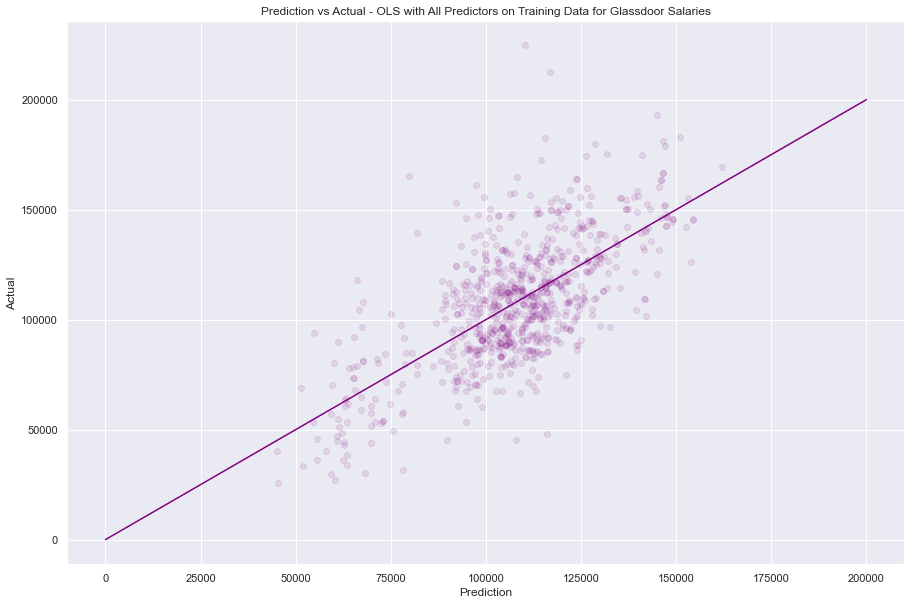

In [43]:
#plotting the predictions 
plt.figure(figsize=(15,10))
plt.scatter(y_train_pred_ols_all, y_train, alpha=.1, color = "purple")
plt.title("Prediction vs Actual - OLS with All Predictors on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.plot(np.linspace(0,200000,1000), np.linspace(0,200000,1000), color = "purple")

plt.savefig('OLS_ALL_PredvsActual_Train.png')


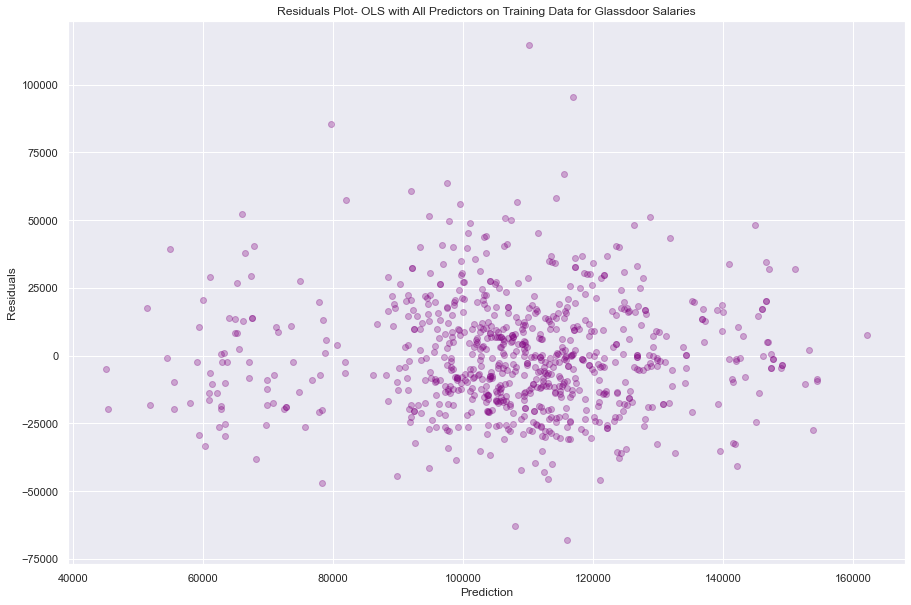

In [44]:
#plotting the residuals 
plt.figure(figsize=(15,10))

residual = plt.scatter(y_train_pred_ols_all, residuals_ols_all, alpha = .3, color = "purple")
plt.title("Residuals Plot- OLS with All Predictors on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.savefig('OLS_ALL_Residuals_Train.png', edgecolor='none')
plt.show()


<Figure size 842.4x595.44 with 0 Axes>

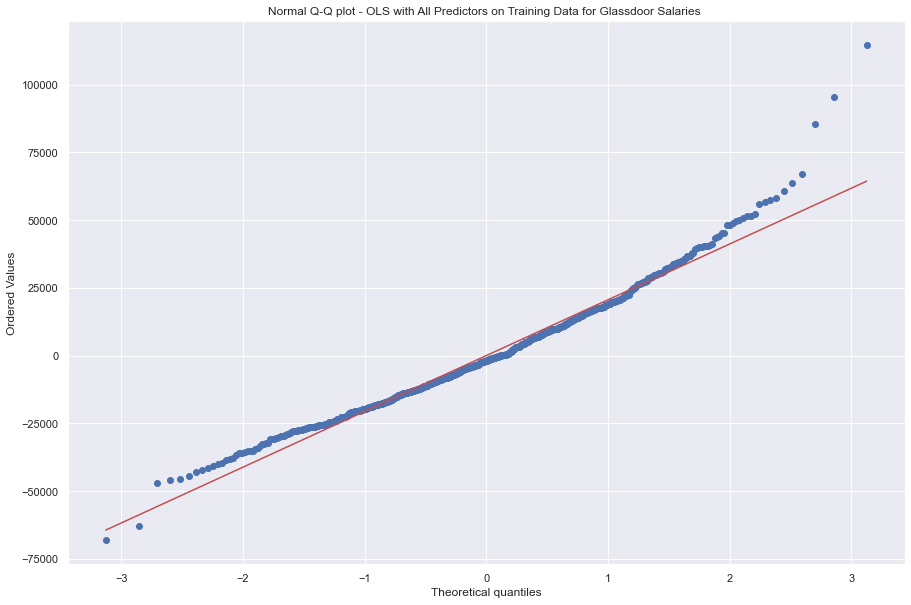

In [45]:
#qq plot
fig = plt.figure()

fig.patch.set_alpha(1)
plt.figure(figsize=(15,10))
stats.probplot(residuals_ols_all, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - OLS with All Predictors on Training Data for Glassdoor Salaries ")

plt.savefig('OLS_ALL_QQ_Train.png', edgecolor='white')

In [46]:
#Step 1: Remove insig features

step1_cols = ["Cash_Bonus", "Reviews", "Jobs","Benefits", "COL", "Purchasing_Power", "Age", "Size_1001 to 5000 Employees", "Size_5001 to 10000 Employees", "Revenue_$5 to $10 billion (USD)", 
             "Revenue_Less than 5 billion (USD)", "Revenue_Unknown / Non-Applicable","Company_Type_Company - Public", "Company_Type_Other","Geo_Map_NORTH_EAST",
             "Geo_Map_SOUTH", "Additional_Pay_bin_Low", "Size_Unknown", "Industry_Final_Other"]
X_train = X_train.drop(step1_cols, axis =1)

ols_step = sm.OLS(y_train, X_train).fit()
print(ols_step.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     65.48
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           4.11e-89
Time:                        10:25:28   Log-Likelihood:                -8911.9
No. Observations:                 783   AIC:                         1.784e+04
Df Residuals:                     773   BIC:                         1.789e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [47]:
# Make predictions on the test set using 
y_train_pred_ols_step = ols_step.predict(X_train)


# Best alpha value found
# no method for alpha for OLS found 

#derive residuals for the model
#deriving residuals 
residuals_ols_step = y_train - y_train_pred_ols_step

#get mae for the model
ols_step_mae=mae(y_train, y_train_pred_ols_step)
print("MAE: " + str(ols_step_mae))

#get RMSE for the model

ols_step_mse = mean_squared_error(y_train, y_train_pred_ols_step)
ols_step_rmse = math.sqrt(ols_step_mse)

print("RMSE: " + str(ols_step_rmse))

#get r2 for ridge model


ols_step_r2=r2_score(y_train, y_train_pred_ols_step)
print("R2: " + str(ols_step_r2))

#get adjust r2 for the model 
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

ols_step_adj_r2 = 1-(1-ols_step_r2)*(783-1)/(783-9-1)
print("Adjusted R2: " + str(ols_step_adj_r2))

results_df.loc[3] = ["OLS_STEP", 9, 783, 0, ols_step_mae,
             ols_step_rmse, ols_step_r2, ols_step_adj_r2]
results_df.head()

MAE: 16524.80435386414
RMSE: 21221.052250181685
R2: 0.43258019217424515
Adjusted R2: 0.4259737519796374


,TEST,FEAT,OBS,ALPHA,MAE,RMSE,R2,ADJ_R2
0,LASSO,24,783,138.488637,16138.464503,20873.196369,0.451030,0.433648
1,RIDGE,28,783,7.054802,16117.856067,20851.420098,0.452175,0.431831
2,OLS_ALL,28,783,0.000000,16059.892758,20812.746450,0.454205,0.433937
3,OLS_STEP,9,783,0.000000,16524.804354,21221.052250,0.432580,0.425974


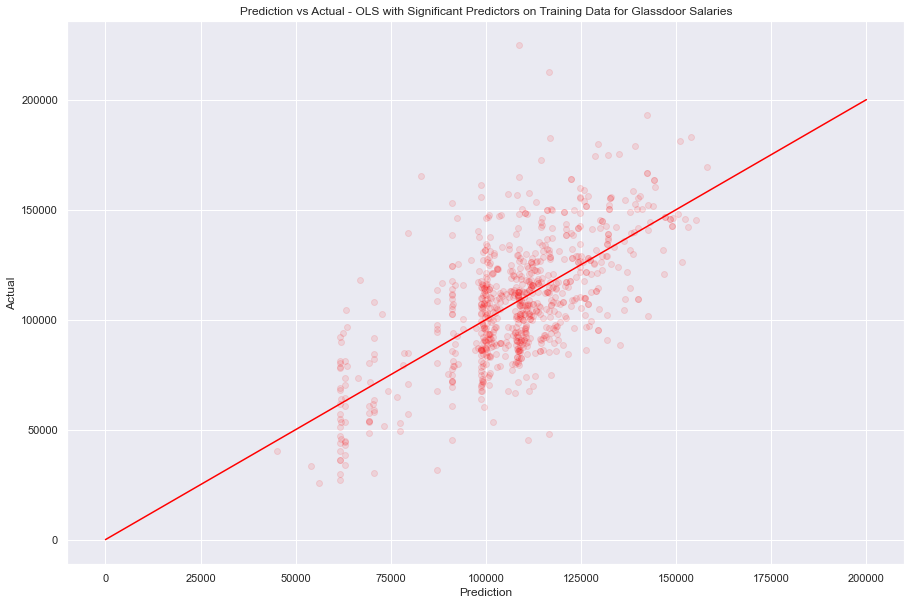

In [48]:
#plotting the predictions 
plt.figure(figsize=(15,10))
plt.scatter(y_train_pred_ols_step, y_train, alpha=.1, color = "red")
plt.title("Prediction vs Actual - OLS with Significant Predictors on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.plot(np.linspace(0,200000,1000), np.linspace(0,200000,1000), color = "red")

plt.savefig('OLS_STEP_PredvsActual_Train.png')

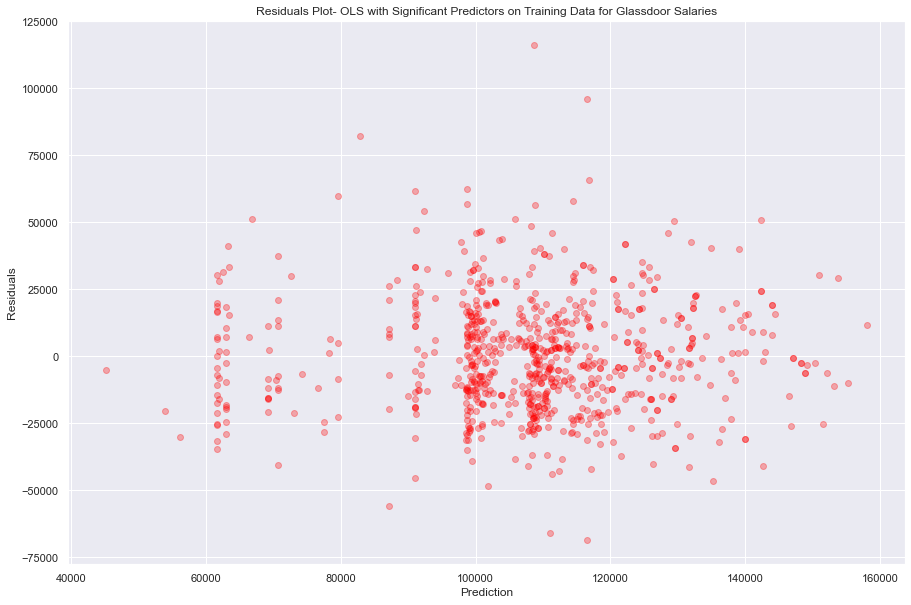

In [49]:
#plotting the residuals 
plt.figure(figsize=(15,10))

residual = plt.scatter(y_train_pred_ols_step, residuals_ols_step, alpha = .3, color = "red")
plt.title("Residuals Plot- OLS with Significant Predictors on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.savefig('OLS_STEP_Residuals_Train.png', edgecolor='none')
plt.show()

<Figure size 842.4x595.44 with 0 Axes>

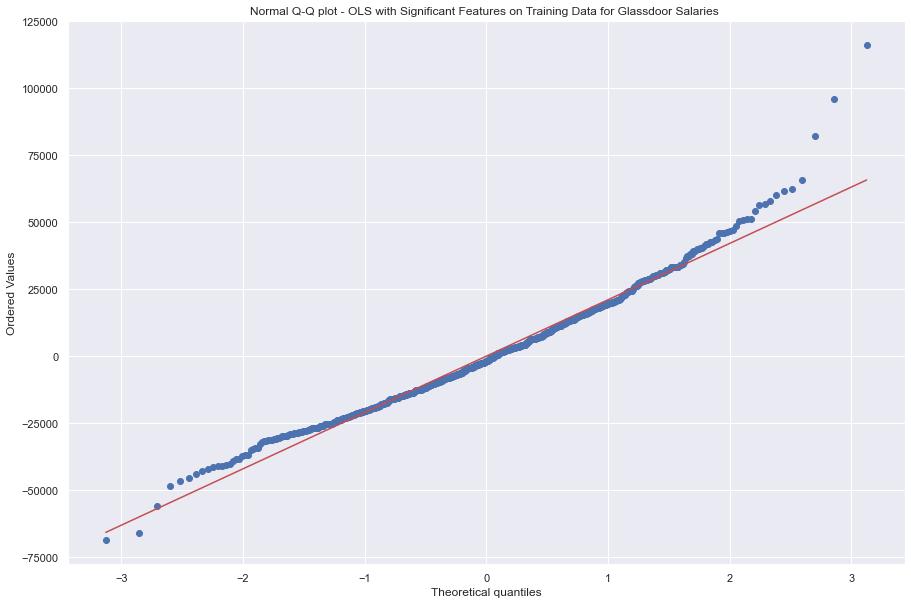

In [50]:
#qq plot
fig = plt.figure()

fig.patch.set_alpha(1)
plt.figure(figsize=(15,10))
stats.probplot(residuals_ols_step, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - OLS with Significant Features on Training Data for Glassdoor Salaries ")

plt.savefig('OLS_STEP_QQ_Train.png', edgecolor='white')

In [51]:
#create instance of influence
influence = ols_step.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance



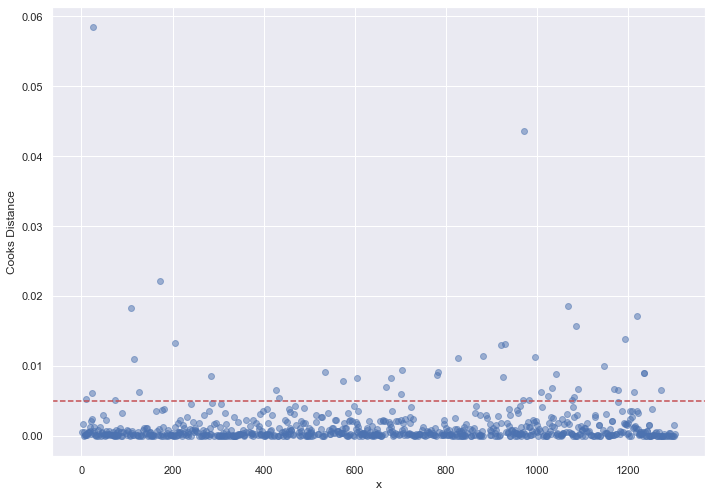

In [52]:
#graph cooks distance 

import matplotlib.pyplot as plt

plt.scatter(X_train.index, cooks[0], alpha =.5)
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.axhline(y=0.005, color='r', linestyle='--')
plt.show()

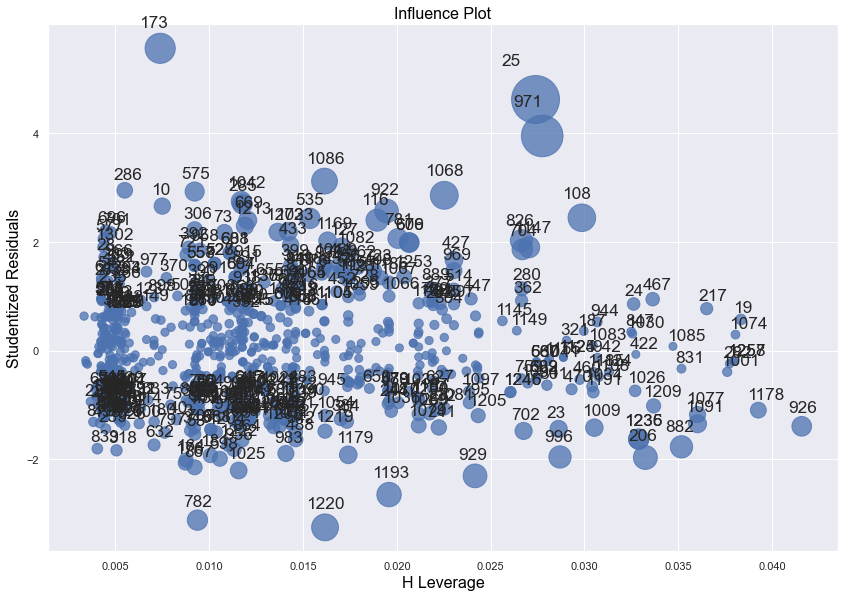

In [53]:
fig = sm.graphics.influence_plot(ols_step, criterion="cooks", alpha=0.5)
fig.tight_layout(pad=0.5)



Leverage vs. Studentized Residuals


,Salary,dfb_const,dfb_Low,dfb_Salaries,dfb_Size_Less Than 1000,dfb_Revenue_$2 to $5 billion (USD),dfb_Internship_INTERN / PART TIME,dfb_Company_Type_Subsidiary or Business Segment,dfb_Geo_Map_WEST,dfb_Industry_Final_Technology,dfb_Interact_West_Tech,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
645,84564.5,0.007070,0.020064,0.005905,-0.036822,0.001432,0.013090,0.005718,0.001958,-0.041936,0.022550,0.000554,-0.684805,0.011681,-0.074450,-0.684569,-0.074425
768,138623.0,0.013438,0.042819,-0.032023,-0.029313,-0.014423,-0.000802,-0.003679,0.001271,0.060741,-0.039336,0.000771,0.823915,0.011223,0.087780,0.823744,0.087762
962,125250.5,0.043527,-0.052101,-0.000002,0.002331,0.181872,-0.027865,-0.032265,-0.034773,-0.043195,0.031519,0.004299,1.535389,0.017908,0.207332,1.536741,0.207514
1304,94775.0,-0.042590,-0.026048,0.019409,0.015647,0.010119,0.002476,0.005774,0.017174,0.016527,-0.008044,0.000264,-0.732439,0.004901,-0.051401,-0.732220,-0.051385
830,71710.5,-0.028643,0.024400,-0.000737,-0.061720,-0.001247,0.015172,0.010003,0.026059,0.031972,-0.021792,0.000764,-0.906109,0.009224,-0.087429,-0.906004,-0.087418


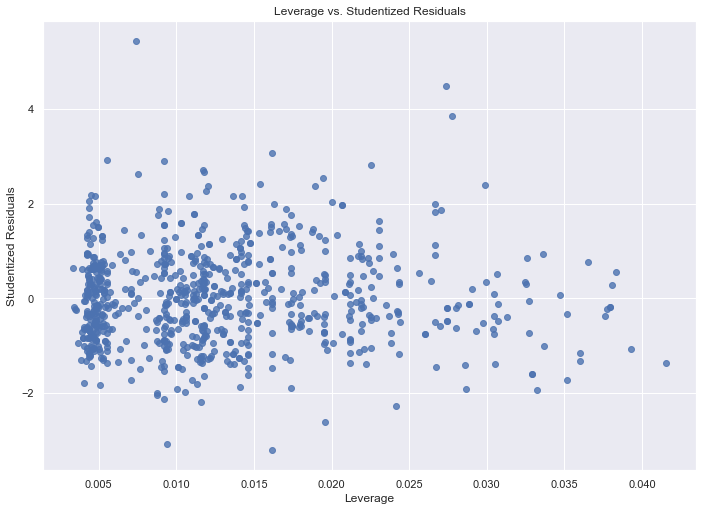

In [54]:
#get cooks distance, sutdentized residuals, and DFFITS 

influence = ols_step.get_influence()
inf_sum = influence.summary_frame()

student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag


print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(x=leverage, y=ols_step.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

salary_res = pd.concat([y_train, inf_sum], axis = 1)
salary_res=salary_res.rename(columns={'hat_diag': 'leverage'})
salary_res.head()

In [55]:
#Identify high leverage
#point with leverage = (2k+2)/n 
#k = number of predictors (9)
#n = number of observations (783)

salary_leverage = ((2*9)+2)/783
salary_leverage

0.02554278416347382

In [56]:
r = salary_res.student_resid
l = salary_res.leverage

In [57]:
#large residual and large leverage = INFLUENTIAL
#Print values that are both outliers and influential
outlier=pd.DataFrame((salary_res.Salary[abs(r) > 2]))
lev= pd.DataFrame((salary_res.Salary[abs(l) > salary_leverage]))



Influential2=pd.merge(outlier,lev, left_index=True, right_index=True)
influential_list = list(Influential2.index)
print(influential_list)

[108, 25, 826, 971]


In [58]:
influential_df = df_model.loc[influential_list,:]
influential_df.head()

,Low,25_%,75_%,High,Cash_Bonus,Stock_Bonus,Total_Pay,Reviews,Jobs,Salaries,Interviews,Benefits,Salary,COL,Rent,COL_Plus_Rent,Purchasing_Power,Age,Size_1001 to 5000 Employees,Size_5001 to 10000 Employees,Size_Less Than 1000,Size_Unknown,Revenue_$2 to $5 billion (USD),Revenue_$5 to $10 billion (USD),Revenue_Less than 5 billion (USD),Revenue_Unknown / Non-Applicable,Internship_INTERN / PART TIME,Confidence_Low Confidence,Confidence_Very High Confidence,Company_Type_Company - Public,Company_Type_Other,Company_Type_Subsidiary or Business Segment,Geo_Map_NORTH_EAST,Geo_Map_SOUTH,Geo_Map_WEST,Industry_Final_Other,Industry_Final_Technology,Additional_Pay_bin_Low,Interact_West_Tech
108,-0.838773,-0.776346,-0.774711,-0.838481,-0.443108,-0.443108,-0.850161,-0.825810,-0.545167,-0.659818,-0.354996,-0.615361,157098.5,63.93,54.47,59.55,129.43,-0.792873,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0
25,-0.838773,-0.776346,-0.774711,-0.838481,-0.443108,-0.443108,-0.850161,-0.521432,-0.503386,0.052632,-0.325091,-0.411743,212501.0,72.38,44.68,59.56,115.56,-1.033561,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0
826,-0.838773,-0.776346,-0.774711,-0.838481,-0.443108,-0.443108,-0.850161,-0.885693,-0.561208,-0.768466,-1.544923,-0.659871,140268.0,67.03,42.37,55.62,104.88,-1.033561,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0
971,-0.838773,-0.776346,-0.774711,-0.838481,-0.443108,-0.443108,-0.850161,1.997117,0.143854,2.521904,0.613968,0.461563,165194.5,69.69,39.21,55.59,119.78,1.172748,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0


In [59]:
#Cook's D of more than 3 times the mean is a possible outlier
#MEDVres.loc[:,"cooks_d"].mean()
cutoff=(salary_res.loc[:,"cooks_d"].mean())*3
outlier2=pd.DataFrame((salary_res.Salary[abs(salary_res.cooks_d) > cutoff]))
outlier_list= list(outlier2.index)
outlier_list  = [x for x in outlier_list if x not in influential_list]
print(outlier_list)

[962, 1025, 669, 996, 469, 1042, 1086, 1009, 575, 983, 285, 241, 969, 286, 1236, 782, 1033, 173, 1147, 127, 1272, 433, 679, 929, 23, 206, 926, 781, 1091, 1077, 306, 1082, 1193, 1235, 73, 922, 10, 535, 427, 1068, 1220, 1213, 1169, 882, 1179, 867, 606, 1178, 704, 702, 116]


In [60]:
outlier_df = df_model.loc[outlier_list,:]
outlier_df.head()

,Low,25_%,75_%,High,Cash_Bonus,Stock_Bonus,Total_Pay,Reviews,Jobs,Salaries,Interviews,Benefits,Salary,COL,Rent,COL_Plus_Rent,Purchasing_Power,Age,Size_1001 to 5000 Employees,Size_5001 to 10000 Employees,Size_Less Than 1000,Size_Unknown,Revenue_$2 to $5 billion (USD),Revenue_$5 to $10 billion (USD),Revenue_Less than 5 billion (USD),Revenue_Unknown / Non-Applicable,Internship_INTERN / PART TIME,Confidence_Low Confidence,Confidence_Very High Confidence,Company_Type_Company - Public,Company_Type_Other,Company_Type_Subsidiary or Business Segment,Geo_Map_NORTH_EAST,Geo_Map_SOUTH,Geo_Map_WEST,Industry_Final_Other,Industry_Final_Technology,Additional_Pay_bin_Low,Interact_West_Tech
962,-0.838773,-0.776346,-0.774711,-0.838481,-0.443108,-0.443108,-0.850161,0.013707,-0.555239,-0.077329,-0.060557,-0.364676,125250.5,69.69,39.21,55.59,119.78,3.038082,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
1025,0.868776,0.856635,0.657193,0.439946,-0.443108,-0.443108,0.566804,-0.748380,-0.545913,-0.535834,-0.389815,-0.596943,88471.0,75.71,70.63,73.36,106.67,0.470741,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1
669,1.702695,1.957947,2.266240,1.834594,-0.443108,-0.443108,2.241307,2.264115,2.195623,0.026640,1.881635,0.768525,193022.0,79.72,74.07,77.11,97.27,-0.692586,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1
996,-0.838773,-0.776346,-0.774711,-0.838481,-0.443108,-0.443108,-0.850161,2.569255,4.806966,3.665566,1.294003,0.359243,101538.0,64.39,39.87,53.05,137.30,-0.492012,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,1
469,2.159365,2.109853,1.985764,1.653806,-0.443108,-0.443108,1.696086,-0.753720,-0.493313,-0.637204,-0.205707,-0.583642,158980.0,75.01,75.37,75.18,132.82,-0.893159,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0


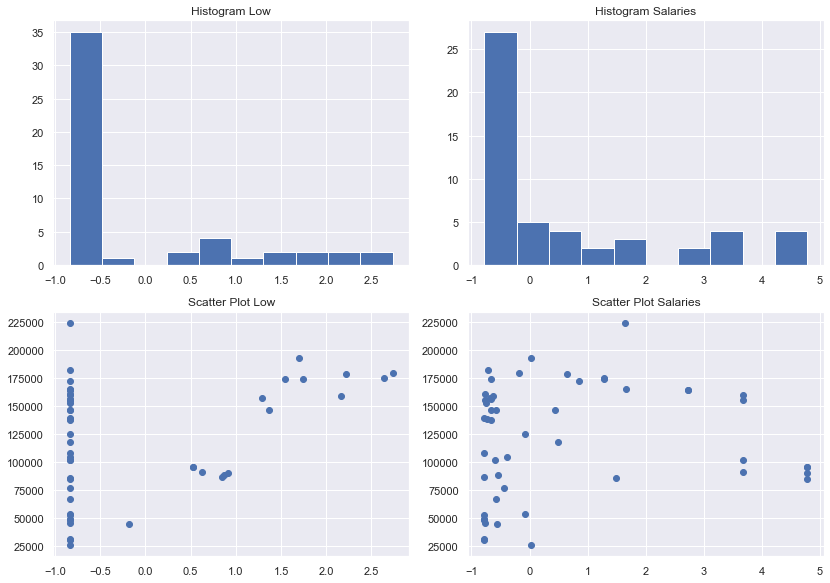

In [61]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(outlier_df.Low)
axs[0, 0].set_title("Histogram Low")
axs[1, 0].scatter(outlier_df.Low, outlier_df.Salary)
axs[1, 0].set_title("Scatter Plot Low")
axs[0, 1].hist(outlier_df.Salaries)
axs[0, 1].set_title("Histogram Salaries")
axs[1, 1].scatter(outlier_df.Salaries, outlier_df.Salary)
axs[1, 1].set_title("Scatter Plot Salaries")
fig.tight_layout()

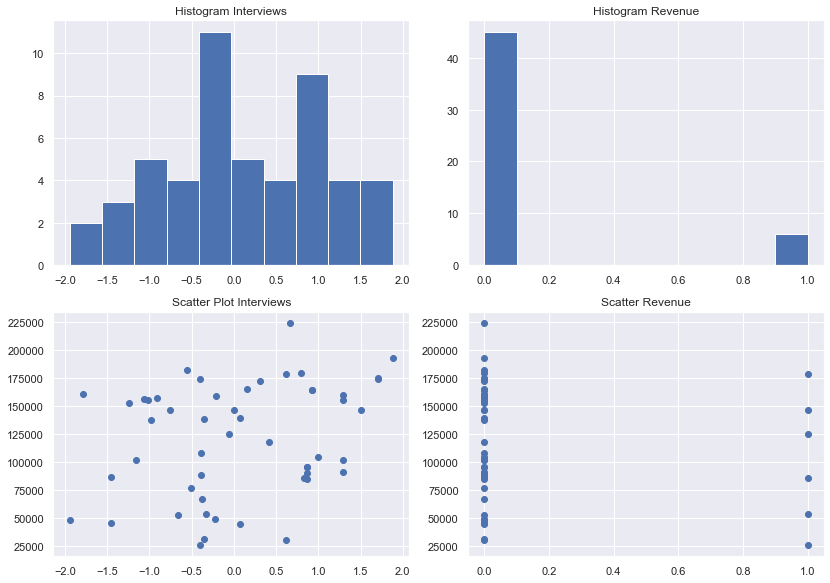

In [62]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(outlier_df.Interviews)
axs[0, 0].set_title("Histogram Interviews")
axs[1, 0].scatter(outlier_df.Interviews, outlier_df.Salary)
axs[1, 0].set_title("Scatter Plot Interviews")
axs[0, 1].hist(outlier_df["Revenue_$2 to $5 billion (USD)"])
axs[0, 1].set_title("Histogram Revenue")
axs[1, 1].scatter(outlier_df["Revenue_$2 to $5 billion (USD)"], outlier_df.Salary)
axs[1, 1].set_title("Scatter Revenue")
fig.tight_layout()

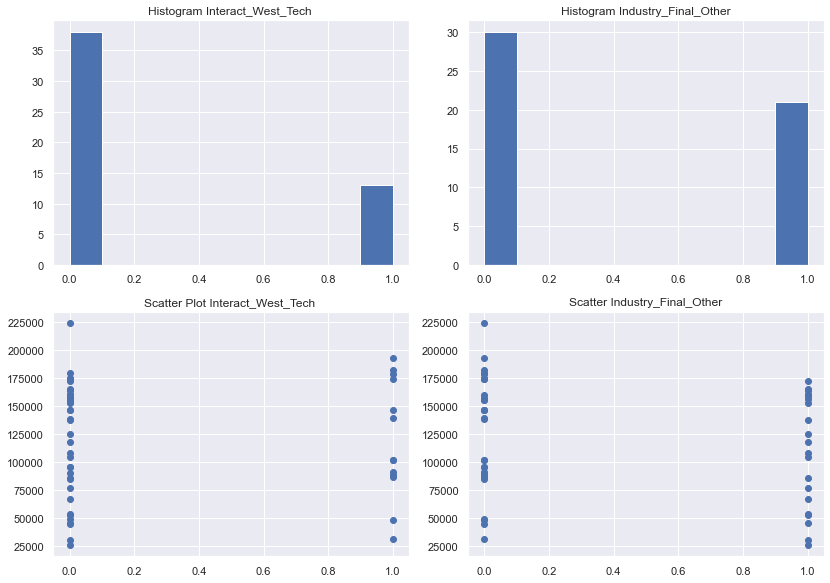

In [63]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(outlier_df.Interact_West_Tech )
axs[0, 0].set_title("Histogram Interact_West_Tech ")
axs[1, 0].scatter(outlier_df.Interact_West_Tech , outlier_df.Salary)
axs[1, 0].set_title("Scatter Plot Interact_West_Tech ")
axs[0, 1].hist(outlier_df["Industry_Final_Other"])
axs[0, 1].set_title("Histogram Industry_Final_Other")
axs[1, 1].scatter(outlier_df["Industry_Final_Other"], outlier_df.Salary)
axs[1, 1].set_title("Scatter Industry_Final_Other")
fig.tight_layout()

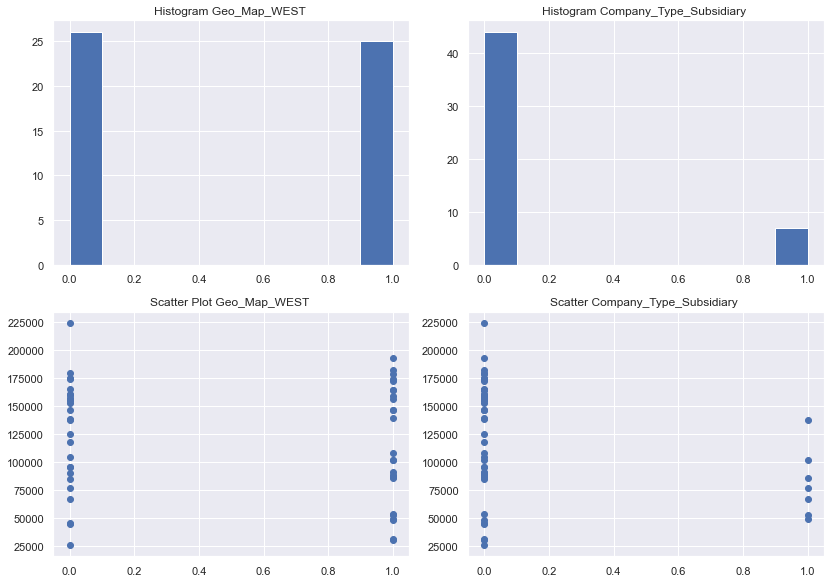

In [64]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(outlier_df.Geo_Map_WEST )
axs[0, 0].set_title("Histogram Geo_Map_WEST ")
axs[1, 0].scatter(outlier_df.Geo_Map_WEST , outlier_df.Salary)
axs[1, 0].set_title("Scatter Plot Geo_Map_WEST ")
axs[0, 1].hist(outlier_df["Company_Type_Subsidiary or Business Segment"])
axs[0, 1].set_title("Histogram Company_Type_Subsidiary ")
axs[1, 1].scatter(outlier_df["Company_Type_Subsidiary or Business Segment"], outlier_df.Salary)
axs[1, 1].set_title("Scatter Company_Type_Subsidiary ")
fig.tight_layout()

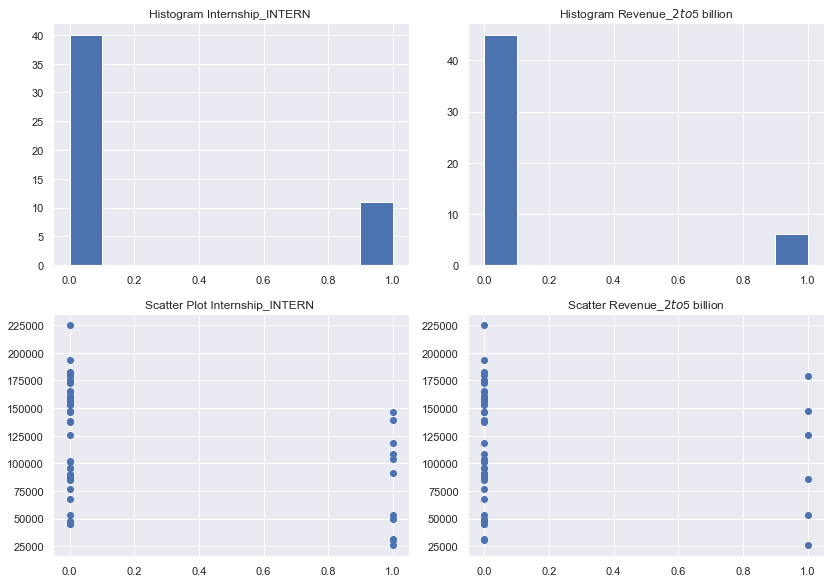

In [65]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(outlier_df["Internship_INTERN / PART TIME"] )
axs[0, 0].set_title("Histogram Internship_INTERN ")
axs[1, 0].scatter(outlier_df["Internship_INTERN / PART TIME"], outlier_df.Salary)
axs[1, 0].set_title("Scatter Plot Internship_INTERN ")
axs[0, 1].hist(outlier_df["Revenue_$2 to $5 billion (USD)"])
axs[0, 1].set_title("Histogram Revenue_$2 to $5 billion")
axs[1, 1].scatter(outlier_df["Revenue_$2 to $5 billion (USD)"], outlier_df.Salary)
axs[1, 1].set_title("Scatter Revenue_$2 to $5 billion")
fig.tight_layout()

In [66]:
#remove influential points from train and run model

X_train = X_train.drop(influential_list)
y_train = y_train.drop(influential_list)


In [67]:
#run OLS after removing influential points


ols_inf = sm.OLS(y_train, X_train).fit()

print(ols_inf.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     70.38
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           2.83e-94
Time:                        10:25:35   Log-Likelihood:                -8843.7
No. Observations:                 779   AIC:                         1.771e+04
Df Residuals:                     769   BIC:                         1.775e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [68]:
# Make predictions on the test set using 
y_train_pred_ols_inf = ols_inf.predict(X_train)


# Best alpha value found
# no method for alpha for OLS found 

#derive residuals for the model
#deriving residuals 
residuals_ols_inf = y_train - y_train_pred_ols_inf

#get mae for the model
ols_inf_mae=mae(y_train, y_train_pred_ols_inf)
print("MAE: " + str(ols_inf_mae))

#get RMSE for the model

ols_inf_mse = mean_squared_error(y_train, y_train_pred_ols_inf)
ols_inf_rmse = math.sqrt(ols_inf_mse)

print("RMSE: " + str(ols_inf_rmse))

#get r2 for ridge model


ols_inf_r2=r2_score(y_train, y_train_pred_ols_inf)
print("R2: " + str(ols_inf_r2))

#get adjust r2 for the model 
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

ols_inf_adj_r2 = 1-(1-ols_inf_r2)*(779-1)/(779-9-1)
print("Adjusted R2: " + str(ols_inf_adj_r2))

results_df.loc[4] = ["OLS_INF", 9, 779, 0, ols_inf_mae,
             ols_inf_rmse, ols_inf_r2, ols_inf_adj_r2]
results_df.head()

MAE: 16156.333777491034
RMSE: 20612.63037978771
R2: 0.4516597742238183
Adjusted R2: 0.445242268330469


,TEST,FEAT,OBS,ALPHA,MAE,RMSE,R2,ADJ_R2
0,LASSO,24,783,138.488637,16138.464503,20873.196369,0.451030,0.433648
1,RIDGE,28,783,7.054802,16117.856067,20851.420098,0.452175,0.431831
2,OLS_ALL,28,783,0.000000,16059.892758,20812.746450,0.454205,0.433937
3,OLS_STEP,9,783,0.000000,16524.804354,21221.052250,0.432580,0.425974
4,OLS_INF,9,779,0.000000,16156.333777,20612.630380,0.451660,0.445242


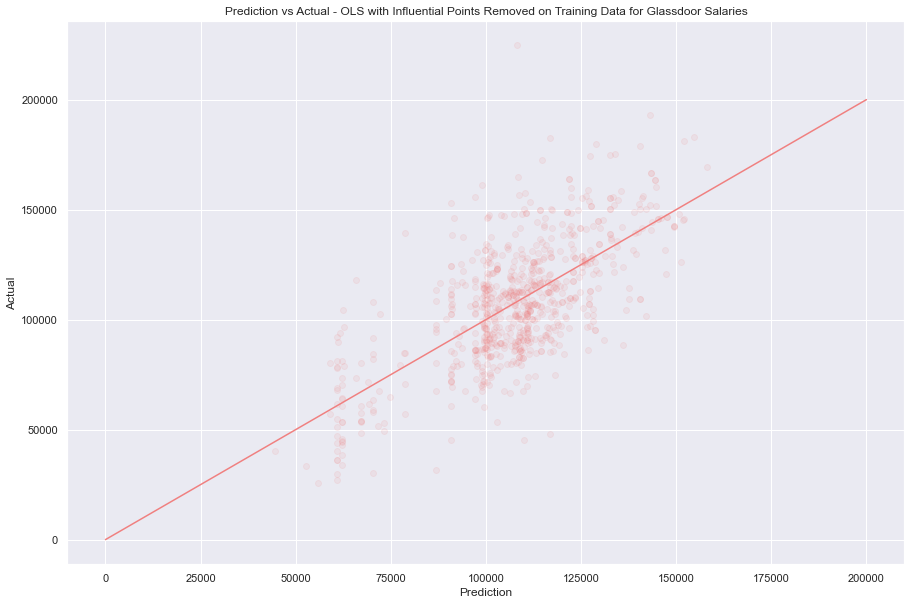

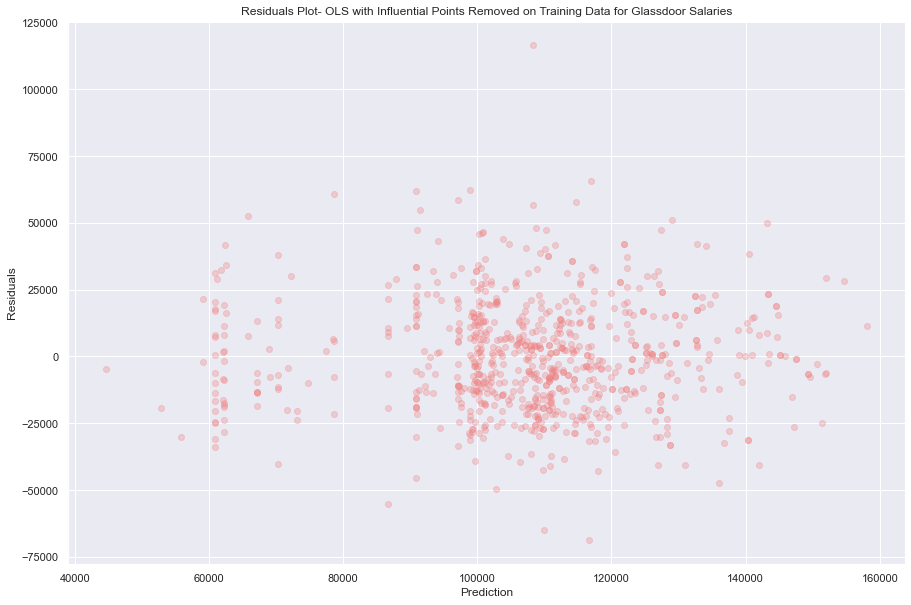

<Figure size 842.4x595.44 with 0 Axes>

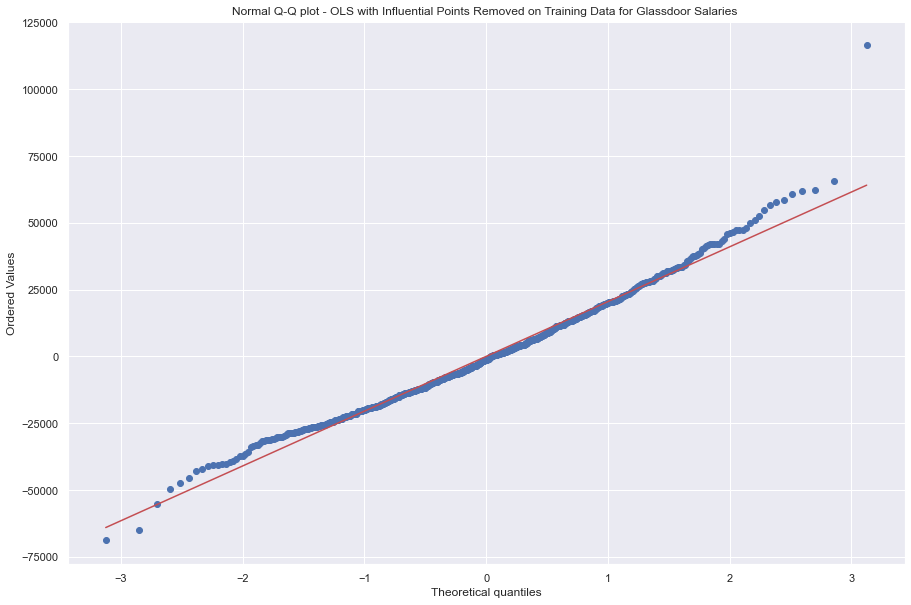

In [70]:
#plotting the predictions 
plt.figure(figsize=(15,10))
plt.scatter(y_train_pred_ols_inf, y_train, alpha=.1, color = "lightcoral")
plt.title("Prediction vs Actual - OLS with Influential Points Removed on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.plot(np.linspace(0,200000,1000), np.linspace(0,200000,1000), color = "lightcoral")

plt.savefig('OLS_INF_PredvsActual_Train.png')


#plotting the residuals 
plt.figure(figsize=(15,10))

residual = plt.scatter(y_train_pred_ols_inf, residuals_ols_inf, alpha = .3, color = "lightcoral")
plt.title("Residuals Plot- OLS with Influential Points Removed on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.savefig('OLS_INF_Train.png', edgecolor='none',dpi=400)
plt.show()


#qq plot
fig = plt.figure()

fig.patch.set_alpha(1)
plt.figure(figsize=(15,10))
stats.probplot(residuals_ols_inf, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - OLS with Influential Points Removed on Training Data for Glassdoor Salaries ")

plt.savefig('OLS_INF_QQ_Train.png', edgecolor='white', dpi=400)

In [71]:
#remove outliers  from train and run model

X_train = X_train.drop(outlier_list)
y_train = y_train.drop(outlier_list)


In [72]:
#run OLS after removing outliers and insig feature

step2_cols = ["Company_Type_Subsidiary or Business Segment"]
X_train = X_train.drop(step2_cols, axis =1)


ols_out = sm.OLS(y_train, X_train).fit()

print(ols_out.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     104.1
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          9.56e-115
Time:                        10:26:14   Log-Likelihood:                -8134.1
No. Observations:                 728   AIC:                         1.629e+04
Df Residuals:                     719   BIC:                         1.633e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [73]:
# Make predictions on the test set using 
y_train_pred_ols_out = ols_out.predict(X_train)


# Best alpha value found
# no method for alpha for OLS found 

#derive residuals for the model
#deriving residuals 
residuals_ols_out = y_train - y_train_pred_ols_out

#get mae for the model
ols_out_mae=mae(y_train, y_train_pred_ols_out)
print("MAE: " + str(ols_out_mae))

#get RMSE for the model

ols_out_mse = mean_squared_error(y_train, y_train_pred_ols_out)
ols_out_rmse = math.sqrt(ols_out_mse)

print("RMSE: " + str(ols_out_rmse))

#get r2 for ridge model


ols_out_r2=r2_score(y_train, y_train_pred_ols_out)
print("R2: " + str(ols_out_r2))

#get adjust r2 for the model 
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

ols_out_adj_r2 = 1-(1-ols_out_r2)*(728-1)/(726-8-1)
print("Adjusted R2: " + str(ols_out_adj_r2))

results_df.loc[5] = ["OLS_OUT", 8, 728, 0, ols_out_mae,
             ols_out_rmse, ols_out_r2, ols_out_adj_r2]
results_df.tail()

MAE: 14129.892046167879
RMSE: 17227.546914760012
R2: 0.5366573326825645
Adjusted R2: 0.5301950918552643


,TEST,FEAT,OBS,ALPHA,MAE,RMSE,R2,ADJ_R2
1,RIDGE,28,783,7.054802,16117.856067,20851.420098,0.452175,0.431831
2,OLS_ALL,28,783,0.000000,16059.892758,20812.746450,0.454205,0.433937
3,OLS_STEP,9,783,0.000000,16524.804354,21221.052250,0.432580,0.425974
4,OLS_INF,9,779,0.000000,16156.333777,20612.630380,0.451660,0.445242
5,OLS_OUT,8,728,0.000000,14129.892046,17227.546915,0.536657,0.530195


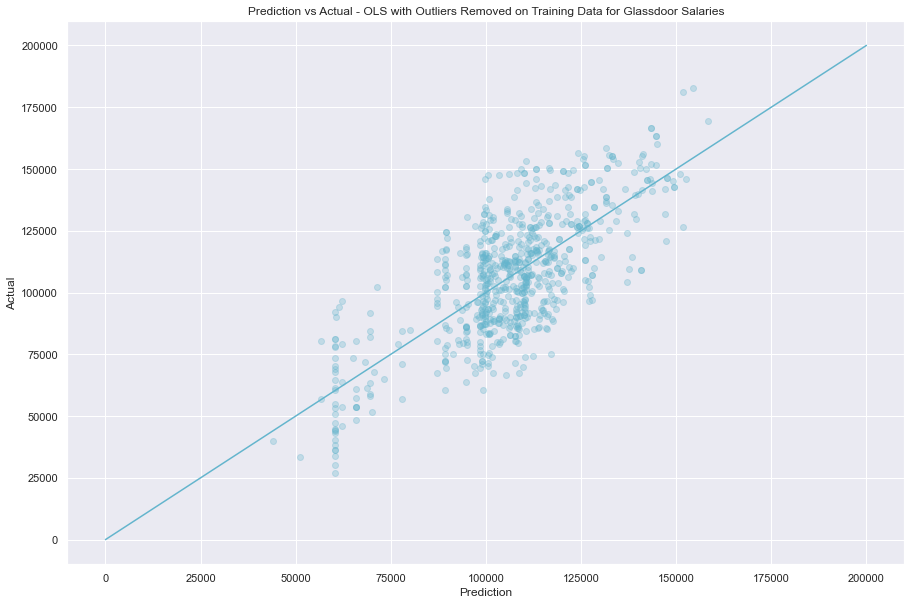

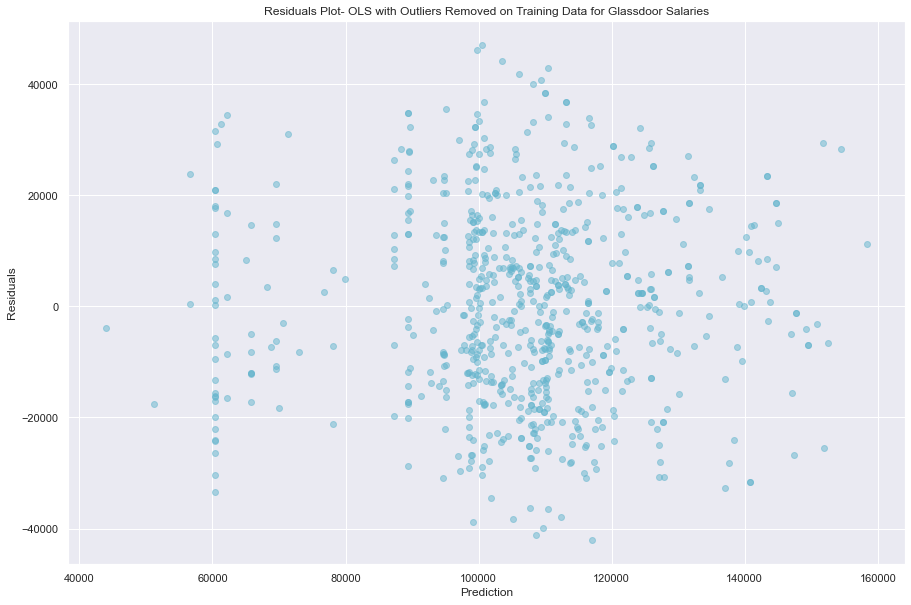

<Figure size 842.4x595.44 with 0 Axes>

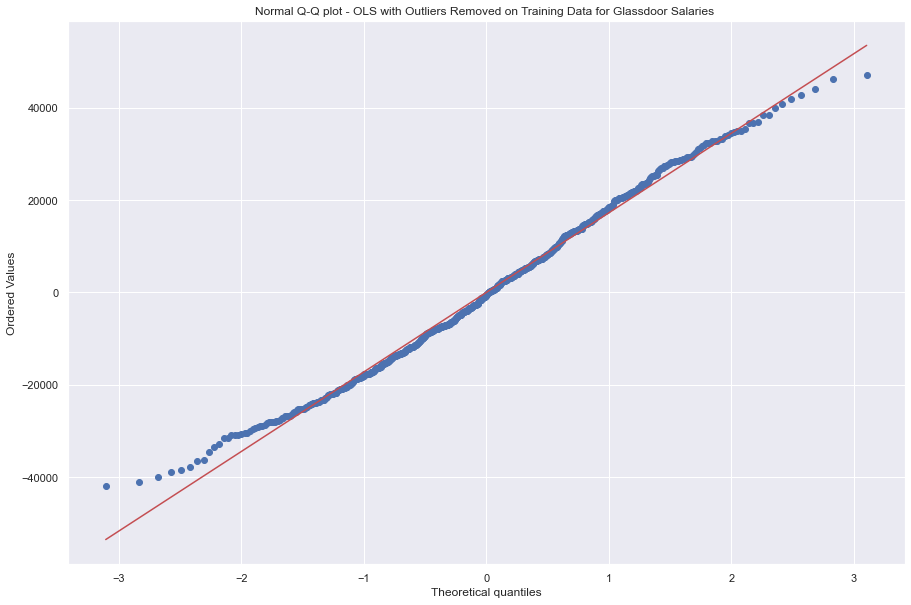

In [74]:
#plotting the predictions 
plt.figure(figsize=(15,10))
plt.scatter(y_train_pred_ols_out, y_train, alpha=.3, color = "c")
plt.title("Prediction vs Actual - OLS with Outliers Removed on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.plot(np.linspace(0,200000,1000), np.linspace(0,200000,1000), color = "c")

plt.savefig('OLS_OUT_PredvsActual_Train.png')


#plotting the residuals 
plt.figure(figsize=(15,10))

residual = plt.scatter(y_train_pred_ols_out, residuals_ols_out, alpha = .5, color = "c")
plt.title("Residuals Plot- OLS with Outliers Removed on Training Data for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.savefig('OLS_OUT_Residuals_Train.png', edgecolor='none')
plt.show()


#qq plot
fig = plt.figure()

fig.patch.set_alpha(1)
plt.figure(figsize=(15,10))
stats.probplot(residuals_ols_out, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - OLS with Outliers Removed on Training Data for Glassdoor Salaries ")

plt.savefig('OLS_OUT_QQ_Train.png', edgecolor='white')

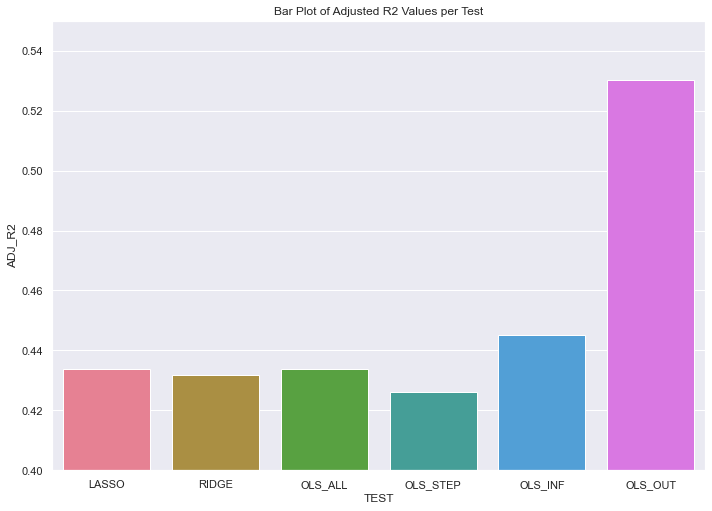

In [75]:
#bar plot of adjusted R2 per test

ax = sns.barplot(x=results_df.TEST,y=results_df.ADJ_R2, palette = 'husl').set_title("Bar Plot of Adjusted R2 Values per Test")
plt.ylim(0.4, 0.55)
fig = ax.get_figure()
fig.savefig("Bar_Plot_ADJ_R2.png")


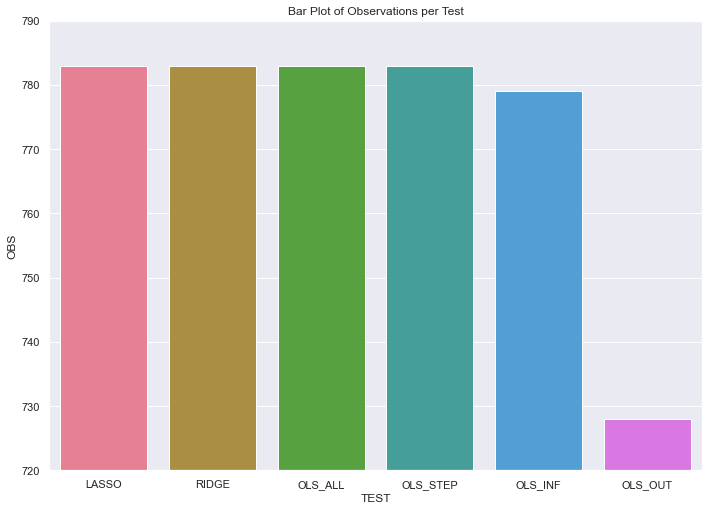

In [76]:
#bar plot of observations per test

ax2= sns.barplot(x=results_df.TEST,y=results_df.OBS, palette = 'husl').set_title("Bar Plot of Observations per Test")
plt.ylim(720, 790)
fig = ax2.get_figure()
fig.savefig("Bar_Plot_Observations.png")


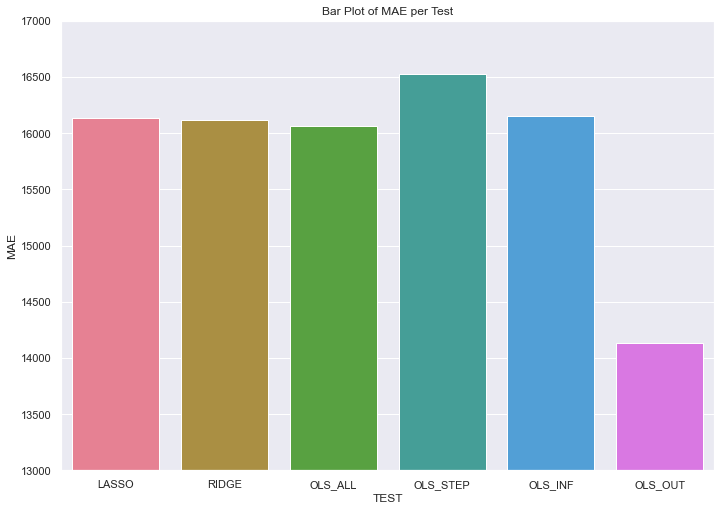

In [77]:
#bar plot of MAE per test

ax3 = sns.barplot(x=results_df.TEST,y=results_df.MAE, palette = 'husl').set_title("Bar Plot of MAE per Test")
plt.ylim(13000, 17000)
fig = ax3.get_figure()
fig.savefig("Bar_Plot_MAE.png")

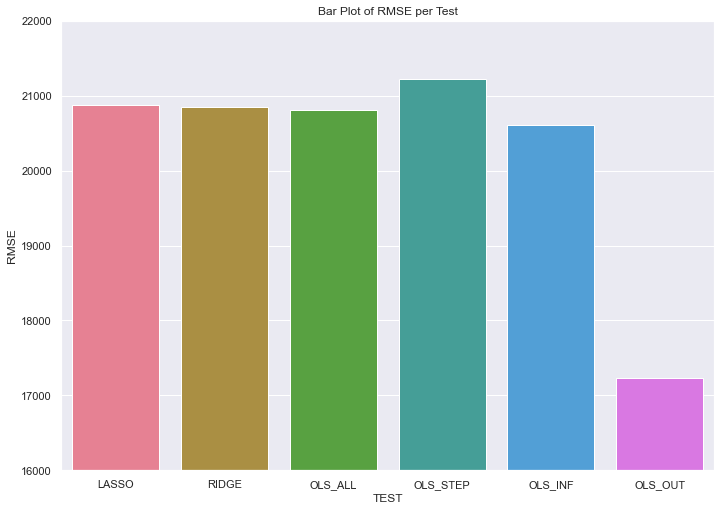

In [78]:
#bar plot of RMSE per test

ax4= sns.barplot(x=results_df.TEST,y=results_df.RMSE, palette = 'husl').set_title("Bar Plot of RMSE per Test")
plt.ylim(16000, 22000)
fig = ax4.get_figure()
fig.savefig("Bar_Plot_RMSE.png")


In [79]:
results_df

,TEST,FEAT,OBS,ALPHA,MAE,RMSE,R2,ADJ_R2
0,LASSO,24,783,138.488637,16138.464503,20873.196369,0.451030,0.433648
1,RIDGE,28,783,7.054802,16117.856067,20851.420098,0.452175,0.431831
2,OLS_ALL,28,783,0.000000,16059.892758,20812.746450,0.454205,0.433937
3,OLS_STEP,9,783,0.000000,16524.804354,21221.052250,0.432580,0.425974
4,OLS_INF,9,779,0.000000,16156.333777,20612.630380,0.451660,0.445242
5,OLS_OUT,8,728,0.000000,14129.892046,17227.546915,0.536657,0.530195


In [80]:
#Lasso Validation 

Glassdoor_Lasso_Val = Lasso(alpha=138.488637)
Glassdoor_Lasso_Val.fit(X_val,y_val)

Lasso(alpha=138.488637)

In [81]:
#Standardized coefficients found
# when refit using that best alpha
list(zip(X_val.columns, Glassdoor_Lasso_Val.coef_))

[('Low', 6160.773530896295),
 ('Cash_Bonus', 1133.041419734969),
 ('Reviews', -2633.6047553440976),
 ('Jobs', -551.3459581982421),
 ('Salaries', 3457.722421604123),
 ('Interviews', 6507.5368952435065),
 ('Benefits', -112.24796178698672),
 ('COL', 368.9962932812438),
 ('Purchasing_Power', 339.88827726294744),
 ('Age', -2525.0700858524706),
 ('Size_1001 to 5000 Employees', 238.0139262743605),
 ('Size_5001 to 10000 Employees', 3049.3938477843035),
 ('Size_Less Than 1000', 1121.0795015722106),
 ('Size_Unknown', -0.0),
 ('Revenue_$2 to $5 billion (USD)', -0.0),
 ('Revenue_$5 to $10 billion (USD)', -0.0),
 ('Revenue_Less than 5 billion (USD)', 0.0),
 ('Revenue_Unknown / Non-Applicable', 1298.874275882876),
 ('Internship_INTERN / PART TIME', -37013.91778755422),
 ('Company_Type_Company - Public', 664.7842860672091),
 ('Company_Type_Other', -10282.095622833109),
 ('Company_Type_Subsidiary or Business Segment', -0.0),
 ('Geo_Map_NORTH_EAST', -0.0),
 ('Geo_Map_SOUTH', 0.0),
 ('Geo_Map_WEST', 640

In [82]:
X_val.shape, y_val.shape

((261, 29), (261,))

In [83]:

# Make predictions on the test set using lasso
y_val_pred_lasso = Glassdoor_Lasso_Val.predict(X_val)



#get mae for lasso cv model
lasso_val_mae = mae(y_val, y_val_pred_lasso)
print("MAE: " + str(lasso_val_mae))


#derive residuals for the model

residuals_lasso_val = y_val - y_val_pred_lasso

#define mse and rmse 

lasso_val_mse = mean_squared_error(y_val, y_val_pred_lasso)
lasso_val_rmse = math.sqrt(lasso_val_mse)

print("RMSE: " + str(lasso_val_rmse))

#get r2 for lasso model


lasso_val_r2=r2_score(y_val, y_val_pred_lasso)
print("R2: " + str(lasso_val_r2))

#get adjust r2 for the model 
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

lasso_val_adj_r2 = 1-(1-lasso_val_r2)*(261-1)/(261-22-1)
print("Adjusted R2: " + str(lasso_val_adj_r2))

MAE: 15577.056553322127
RMSE: 20184.32545221389
R2: 0.5131654453575618
Adjusted R2: 0.4681639319032188


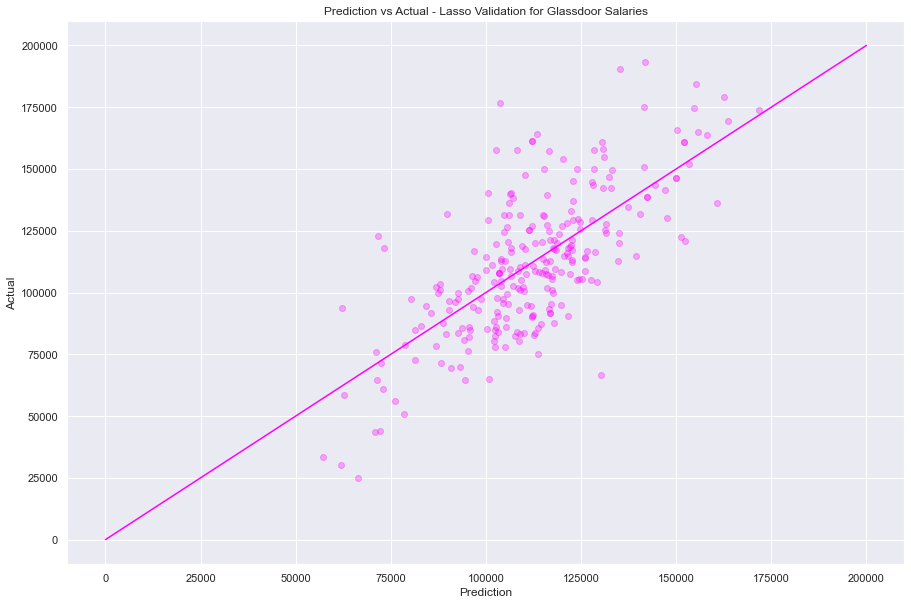

In [84]:
#plotting the predictions 
plt.figure(figsize=(15,10))
plt.scatter(y_val_pred_lasso, y_val, alpha=.3, color = "magenta")
plt.title("Prediction vs Actual - Lasso Validation for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.plot(np.linspace(0,200000,1000), np.linspace(0,200000,1000), color = "magenta")

plt.savefig('Lasso_PredvsActual_Val.png')


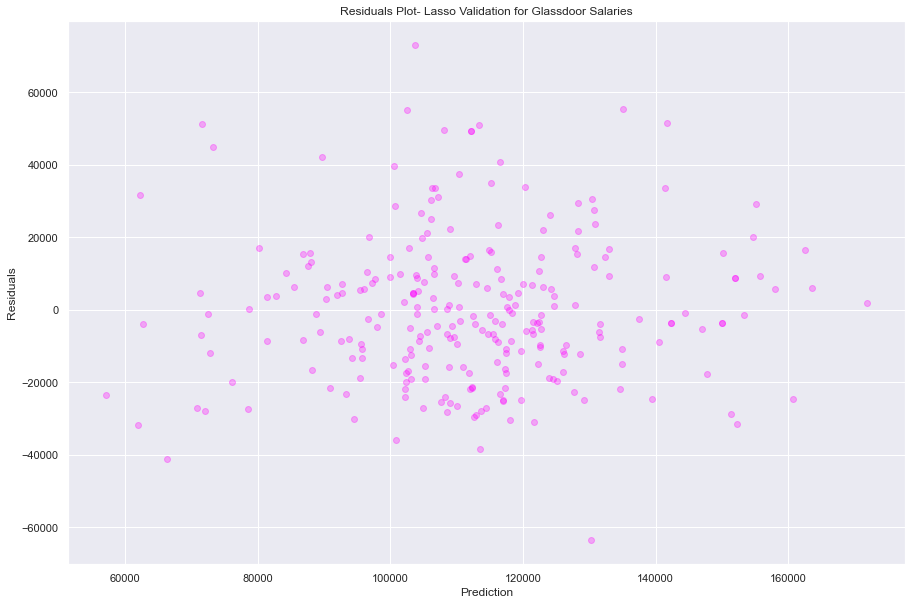

In [85]:
#plotting the residuals 
plt.figure(figsize=(15,10))

residual = plt.scatter(y_val_pred_lasso, residuals_lasso_val, alpha = .3, color = "magenta")
plt.title("Residuals Plot- Lasso Validation for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.savefig('Lasso_residuals_Val.png', edgecolor='none')
plt.show()


<Figure size 842.4x595.44 with 0 Axes>

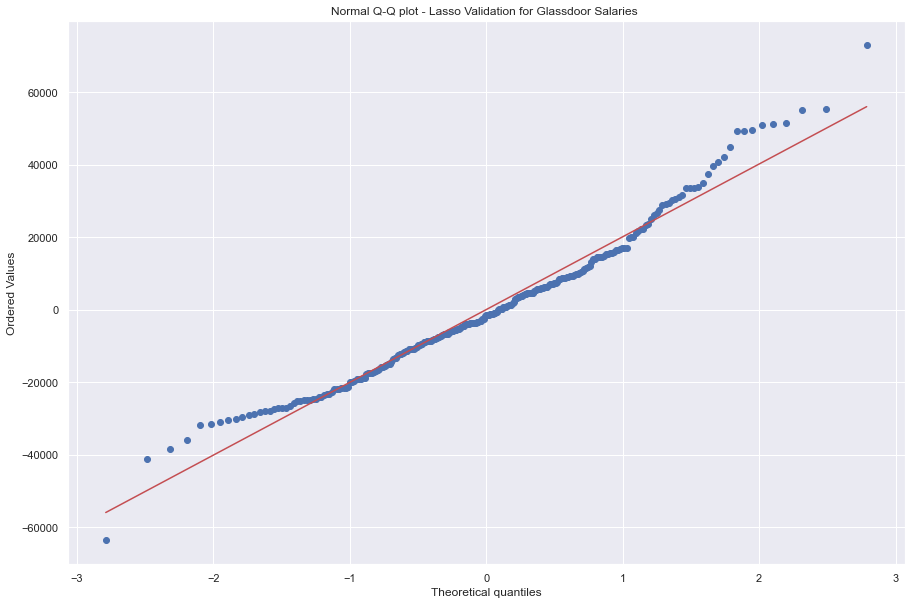

In [86]:
#qq plot
fig = plt.figure()

fig.patch.set_alpha(1)
plt.figure(figsize=(15,10))
stats.probplot(residuals_lasso_val, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Lasso Validation for Glassdoor Salaries ")

plt.savefig('Lasso_QQ_Val.png', edgecolor='white')

In [87]:
#Lasso Test 

Glassdoor_Lasso_Test = Lasso(alpha=138.488637)
Glassdoor_Lasso_Test.fit(X_test,y_test)

Lasso(alpha=138.488637)

In [88]:
#Standardized coefficients found
# when refit using that best alpha
list(zip(X_test.columns, Glassdoor_Lasso_Test.coef_))

[('Low', 5127.933714387385),
 ('Cash_Bonus', 113.60974315872582),
 ('Reviews', 1363.3178814333414),
 ('Jobs', 2360.852975161873),
 ('Salaries', 923.6005317144894),
 ('Interviews', 5770.96389107419),
 ('Benefits', -1457.7908893089873),
 ('COL', -75.92572836170737),
 ('Purchasing_Power', 178.53615137029786),
 ('Age', 2338.5856125685455),
 ('Size_1001 to 5000 Employees', 2354.5501076788933),
 ('Size_5001 to 10000 Employees', 4477.766083612757),
 ('Size_Less Than 1000', 8911.225466921596),
 ('Size_Unknown', 0.0),
 ('Revenue_$2 to $5 billion (USD)', -15144.994271532407),
 ('Revenue_$5 to $10 billion (USD)', 5055.224475311762),
 ('Revenue_Less than 5 billion (USD)', 0.0),
 ('Revenue_Unknown / Non-Applicable', 946.9208568148132),
 ('Internship_INTERN / PART TIME', -37953.57713720887),
 ('Company_Type_Company - Public', 707.6145371761041),
 ('Company_Type_Other', -0.0),
 ('Company_Type_Subsidiary or Business Segment', 0.0),
 ('Geo_Map_NORTH_EAST', 0.0),
 ('Geo_Map_SOUTH', -4817.78465091756),
 

In [89]:
X_test.shape, y_test.shape

((261, 29), (261,))

In [90]:

# Make predictions on the test set using lasso
y_test_pred_lasso = Glassdoor_Lasso_Test.predict(X_test)



#get mae for lasso cv model
lasso_test_mae = mae(y_test, y_test_pred_lasso)
print("MAE: " + str(lasso_test_mae))


#derive residuals for the model

residuals_lasso_test = y_test - y_test_pred_lasso

#define mse and rmse 

lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)
lasso_test_rmse = math.sqrt(lasso_test_mse)

print("RMSE: " + str(lasso_test_rmse))

#get r2 for lasso model


lasso_test_r2=r2_score(y_test, y_test_pred_lasso)
print("R2: " + str(lasso_test_r2))

#get adjust r2 for the model 
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

lasso_test_adj_r2 = 1-(1-lasso_test_r2)*(261-1)/(261-22-1)
print("Adjusted R2: " + str(lasso_test_adj_r2))

MAE: 16669.88106442807
RMSE: 22055.264214901552
R2: 0.4517939414862828
Adjusted R2: 0.40111943187577115


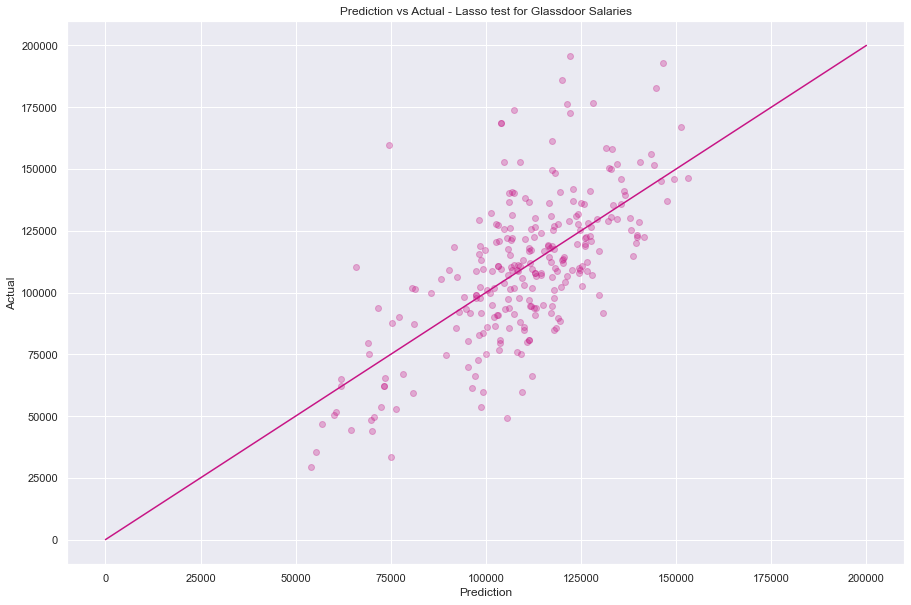

In [91]:
#plotting the predictions 
plt.figure(figsize=(15,10))
plt.scatter(y_test_pred_lasso, y_test, alpha=.3, color = "mediumvioletred")
plt.title("Prediction vs Actual - Lasso test for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.plot(np.linspace(0,200000,1000), np.linspace(0,200000,1000), color = "mediumvioletred")

plt.savefig('Lasso_PredvsActual_test.png')







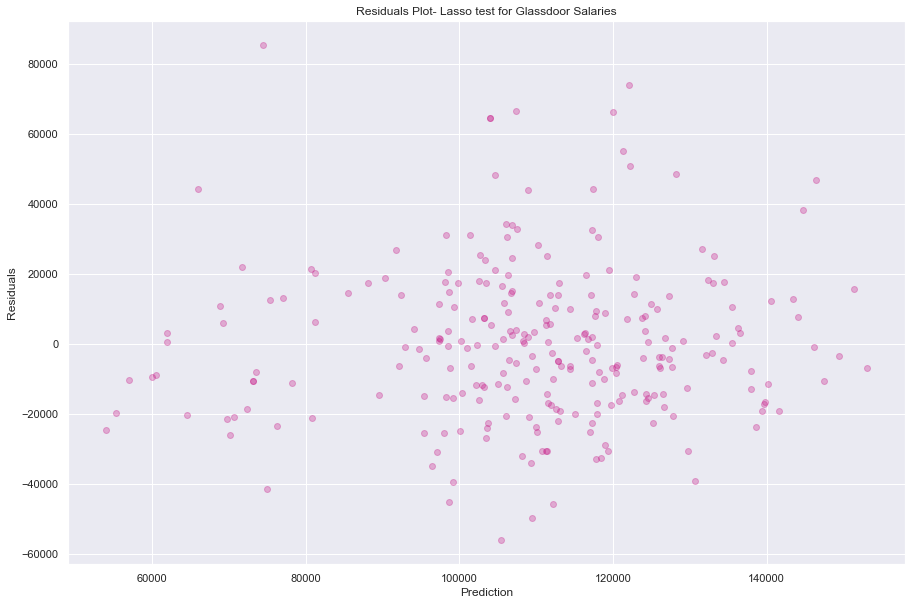

In [92]:
#plotting the residuals 
plt.figure(figsize=(15,10))

residual = plt.scatter(y_test_pred_lasso, residuals_lasso_test, alpha = .3, color = "mediumvioletred")
plt.title("Residuals Plot- Lasso test for Glassdoor Salaries")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.savefig('Lasso_residuals_test.png', edgecolor='none')
plt.show()

<Figure size 842.4x595.44 with 0 Axes>

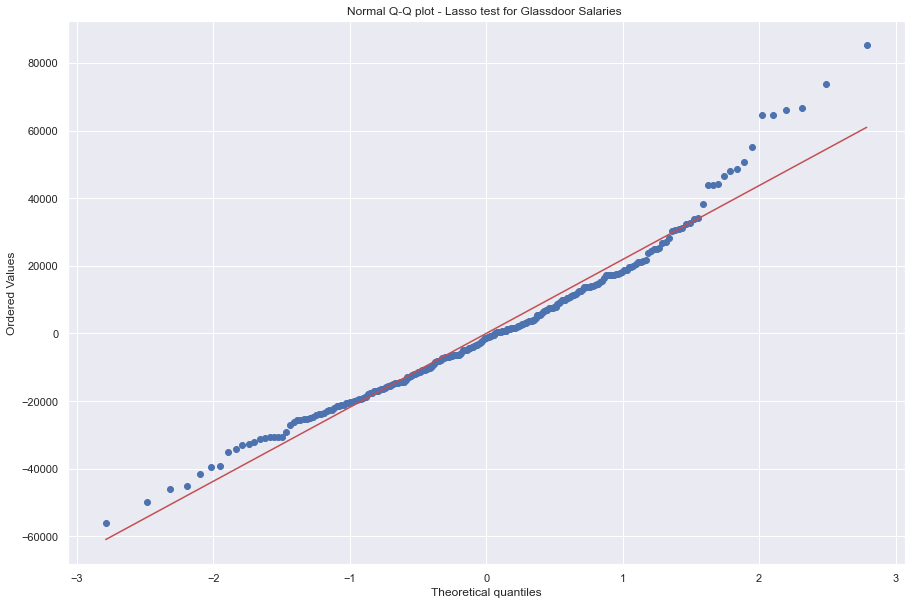

In [93]:
#qq plot
fig = plt.figure()

fig.patch.set_alpha(1)
plt.figure(figsize=(15,10))
stats.probplot(residuals_lasso_test, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Lasso test for Glassdoor Salaries ")

plt.savefig('Lasso_QQ_test.png', edgecolor='white')